In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [17]:
dataset = pd.read_csv('dataset/train.csv')
testset = pd.read_csv('dataset/test.csv')

In [18]:
dataset["Employment_Info_2"].nunique()

36

In [19]:
dataset.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [20]:
# discovering columns with missing values

empty_cols = [i for i in dataset.columns if dataset[i].isnull().any()]
empty_cols

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [21]:
# there can be 3 ways to repopulate missing values
# without considering outliers or exceptional cases

# the method being mean, median and mode

# mean and median for float values and integers - category 1
# mode is ideal for categorical data - category 2

In [22]:
# category 1

dataset['Employment_Info_1'].fillna(value=dataset['Employment_Info_1'].mean(), inplace=True)
dataset['Employment_Info_4'].fillna(value=dataset['Employment_Info_4'].mean(), inplace=True)
dataset['Employment_Info_6'].fillna(value=dataset['Employment_Info_6'].mean(), inplace=True)
dataset['Insurance_History_5'].fillna(value=dataset['Insurance_History_5'].mean(), inplace=True)

dataset['Family_Hist_2'].fillna(value=dataset['Family_Hist_2'].mean(), inplace=True)
dataset['Family_Hist_3'].fillna(value=dataset['Family_Hist_3'].mean(), inplace=True)
dataset['Family_Hist_4'].fillna(value=dataset['Family_Hist_4'].mean(), inplace=True)
dataset['Family_Hist_5'].fillna(value=dataset['Family_Hist_5'].mean(), inplace=True)



In [23]:
# category 2

dataset['Medical_History_1'].fillna(value=dataset['Medical_History_1'].mode()[0], inplace=True)
dataset['Medical_History_10'].fillna(value=dataset['Medical_History_10'].mode()[0], inplace=True)
dataset['Medical_History_15'].fillna(value=dataset['Medical_History_15'].mode()[0], inplace=True)
dataset['Medical_History_24'].fillna(value=dataset['Medical_History_24'].mode()[0], inplace=True)
dataset['Medical_History_32'].fillna(value=dataset['Medical_History_32'].mode()[0], inplace=True)


In [24]:
# studying multicollinearity can help us discard similar variables

# the technique that we shall use to solve multi-collinearity is Variance Inflation Factor (VIF)

# we shall derive a table while calculating the VIF for each feature
# features with similar VIF are highly correlated



for col in dataset.columns:
  print(col, dataset[col].isnull().sum())

Id 0
Product_Info_1 0
Product_Info_2 0
Product_Info_3 0
Product_Info_4 0
Product_Info_5 0
Product_Info_6 0
Product_Info_7 0
Ins_Age 0
Ht 0
Wt 0
BMI 0
Employment_Info_1 0
Employment_Info_2 0
Employment_Info_3 0
Employment_Info_4 0
Employment_Info_5 0
Employment_Info_6 0
InsuredInfo_1 0
InsuredInfo_2 0
InsuredInfo_3 0
InsuredInfo_4 0
InsuredInfo_5 0
InsuredInfo_6 0
InsuredInfo_7 0
Insurance_History_1 0
Insurance_History_2 0
Insurance_History_3 0
Insurance_History_4 0
Insurance_History_5 0
Insurance_History_7 0
Insurance_History_8 0
Insurance_History_9 0
Family_Hist_1 0
Family_Hist_2 0
Family_Hist_3 0
Family_Hist_4 0
Family_Hist_5 0
Medical_History_1 0
Medical_History_2 0
Medical_History_3 0
Medical_History_4 0
Medical_History_5 0
Medical_History_6 0
Medical_History_7 0
Medical_History_8 0
Medical_History_9 0
Medical_History_10 0
Medical_History_11 0
Medical_History_12 0
Medical_History_13 0
Medical_History_14 0
Medical_History_15 0
Medical_History_16 0
Medical_History_17 0
Medical_Histor

In [25]:
print(dataset.corr())


                          Id  Product_Info_1  Product_Info_3  Product_Info_4  \
Id                  1.000000       -0.002870       -0.001869       -0.002914   
Product_Info_1     -0.002870        1.000000        0.027573        0.059829   
Product_Info_3     -0.001869        0.027573        1.000000        0.048775   
Product_Info_4     -0.002914        0.059829        0.048775        1.000000   
Product_Info_5     -0.004195        0.069720        0.025419        0.040433   
...                      ...             ...             ...             ...   
Medical_Keyword_45 -0.000286       -0.006719       -0.053305       -0.019914   
Medical_Keyword_46  0.002684       -0.010638       -0.001538       -0.047318   
Medical_Keyword_47  0.001199        0.004402       -0.017001       -0.021974   
Medical_Keyword_48 -0.001122       -0.008469        0.045862       -0.030896   
Response            0.000462        0.014692       -0.067432        0.202434   

                    Product_Info_5  Pro

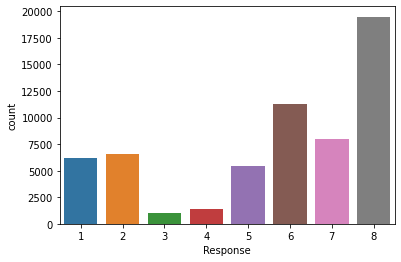

In [26]:
sns.countplot(x=dataset['Response']);

In [27]:
dataset['Response'].value_counts()
dataset.drop('Id',axis=1,inplace=True)

In [28]:
dataset.drop('Product_Info_2',axis=1,inplace=True)

In [29]:
columns =  [col for col in dataset.columns]
columns
columns.remove("Response")

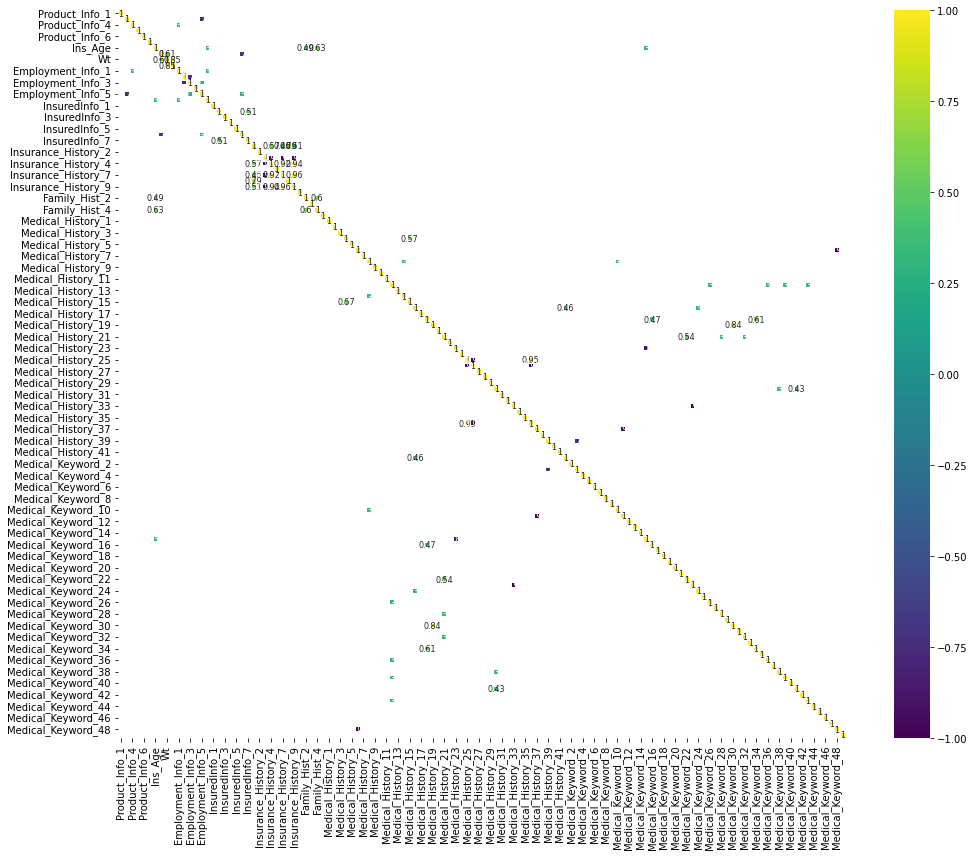

In [30]:
#create a correlation matrix
corr = dataset.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

In [31]:
corr

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Product_Info_1,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,...,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,0.014692
Product_Info_3,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,...,-0.039359,-0.000005,-0.036560,0.034787,0.002696,-0.053305,-0.001538,-0.017001,0.045862,-0.067432
Product_Info_4,0.059829,0.048775,1.000000,0.040433,-0.089075,0.051542,-0.261356,0.141780,-0.028041,-0.129369,...,-0.021352,-0.015152,-0.041935,-0.039131,-0.002671,-0.019914,-0.047318,-0.021974,-0.030896,0.202434
Product_Info_5,0.069720,0.025419,0.040433,1.000000,-0.045840,0.019435,0.006543,0.054495,0.022393,-0.005165,...,-0.008326,0.011878,-0.005644,0.001135,-0.004944,-0.002885,-0.005534,-0.000320,0.004904,-0.001486
Product_Info_6,-0.078684,-0.018855,-0.089075,-0.045840,1.000000,-0.015553,-0.030691,-0.032327,0.014683,0.039228,...,0.017292,-0.009853,0.009682,-0.009387,-0.000026,-0.002870,0.002609,-0.009493,-0.003590,-0.030576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,-0.006719,-0.053305,-0.019914,-0.002885,-0.002870,0.002267,0.043924,-0.062366,-0.027579,0.006493,...,0.014192,-0.000252,0.033351,-0.006628,-0.000201,1.000000,0.003317,0.002923,0.017043,0.004852
Medical_Keyword_46,-0.010638,-0.001538,-0.047318,-0.005534,0.002609,0.008825,0.114839,0.012234,0.073164,0.084485,...,0.012907,0.012757,0.024699,0.022474,0.013181,0.003317,1.000000,0.026243,0.061895,-0.054693
Medical_Keyword_47,0.004402,-0.017001,-0.021974,-0.000320,-0.009493,0.014242,0.062636,-0.012682,0.016217,0.029526,...,0.021684,0.017060,0.046946,0.021482,0.021066,0.002923,0.026243,1.000000,0.044397,-0.060104
Medical_Keyword_48,-0.008469,0.045862,-0.030896,0.004904,-0.003590,0.031756,0.138007,0.102564,0.235822,0.222586,...,0.040558,0.017451,0.067131,0.062229,0.016858,0.017043,0.061895,0.044397,1.000000,-0.159557


In [32]:
#columns are barely multicollinear so we can't drop the columns

Column:  Product_Info_1


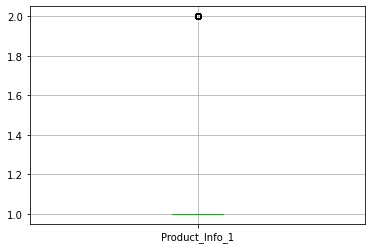

count    59381.000000
mean         1.026355
std          0.160191
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Product_Info_1, dtype: float64
Skewness:  5.913710040075982


Column:  Product_Info_3


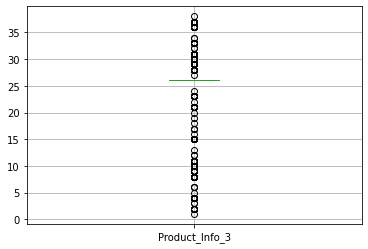

count    59381.000000
mean        24.415655
std          5.072885
min          1.000000
25%         26.000000
50%         26.000000
75%         26.000000
max         38.000000
Name: Product_Info_3, dtype: float64
Skewness:  -2.3762321250568403


Column:  Product_Info_4


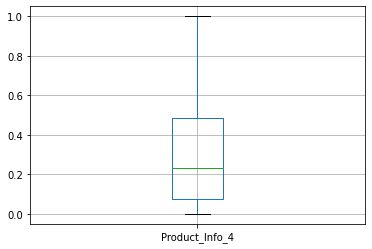

count    59381.000000
mean         0.328952
std          0.282562
min          0.000000
25%          0.076923
50%          0.230769
75%          0.487179
max          1.000000
Name: Product_Info_4, dtype: float64
Skewness:  1.2212725798546873


Column:  Product_Info_5


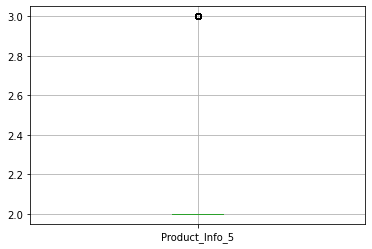

count    59381.000000
mean         2.006955
std          0.083107
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Product_Info_5, dtype: float64
Skewness:  11.865655390570558


Column:  Product_Info_6


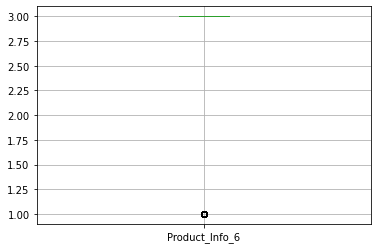

count    59381.000000
mean         2.673599
std          0.739103
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Product_Info_6, dtype: float64
Skewness:  -1.8228096094843784


Column:  Product_Info_7


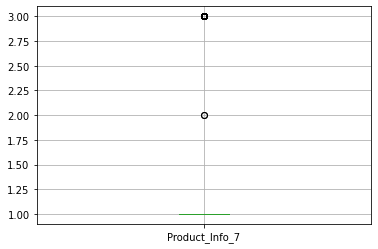

count    59381.000000
mean         1.043583
std          0.291949
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Product_Info_7, dtype: float64
Skewness:  6.550872454080122


Column:  Ins_Age


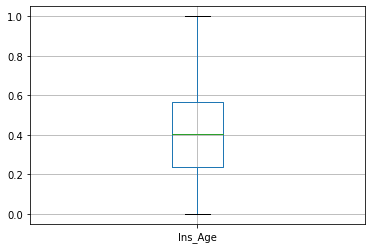

count    59381.000000
mean         0.405567
std          0.197190
min          0.000000
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64
Skewness:  0.021995674311029476


Column:  Ht


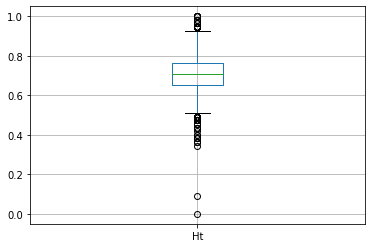

count    59381.000000
mean         0.707283
std          0.074239
min          0.000000
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64
Skewness:  -0.08671154551855319


Column:  Wt


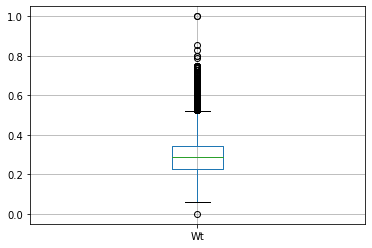

count    59381.000000
mean         0.292587
std          0.089037
min          0.000000
25%          0.225941
50%          0.288703
75%          0.345188
max          1.000000
Name: Wt, dtype: float64
Skewness:  0.6940309063501783


Column:  BMI


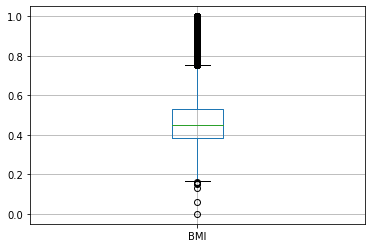

count    59381.000000
mean         0.469462
std          0.122213
min          0.000000
25%          0.385517
50%          0.451349
75%          0.532858
max          1.000000
Name: BMI, dtype: float64
Skewness:  0.944260717685289


Column:  Employment_Info_1


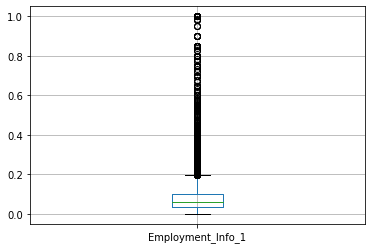

count    59381.000000
mean         0.077582
std          0.082334
min          0.000000
25%          0.035000
50%          0.060000
75%          0.100000
max          1.000000
Name: Employment_Info_1, dtype: float64
Skewness:  4.709304583826976


Column:  Employment_Info_2


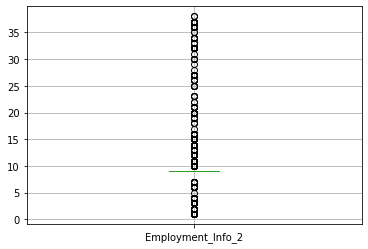

count    59381.000000
mean         8.641821
std          4.227082
min          1.000000
25%          9.000000
50%          9.000000
75%          9.000000
max         38.000000
Name: Employment_Info_2, dtype: float64
Skewness:  0.5634913999800427


Column:  Employment_Info_3


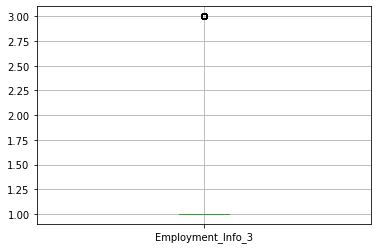

count    59381.000000
mean         1.300904
std          0.715034
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Employment_Info_3, dtype: float64
Skewness:  1.9554847970457538


Column:  Employment_Info_4


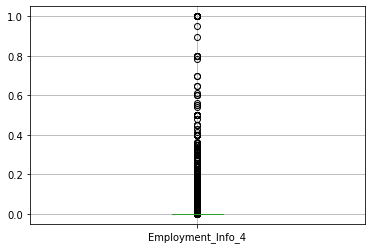

count    59381.000000
mean         0.006283
std          0.030887
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64
Skewness:  16.44711715934277


Column:  Employment_Info_5


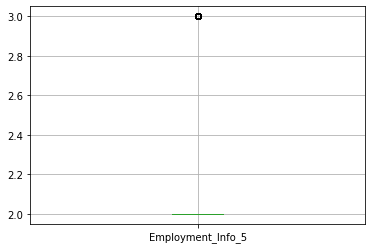

count    59381.000000
mean         2.142958
std          0.350033
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Employment_Info_5, dtype: float64
Skewness:  2.0401144343150253


Column:  Employment_Info_6


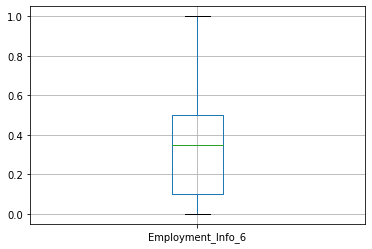

count    59381.000000
mean         0.361469
std          0.315993
min          0.000000
25%          0.100000
50%          0.350000
75%          0.500000
max          1.000000
Name: Employment_Info_6, dtype: float64
Skewness:  0.8703716496406719


Column:  InsuredInfo_1


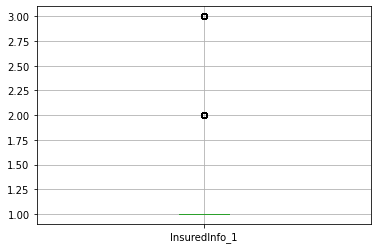

count    59381.000000
mean         1.209326
std          0.417939
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_1, dtype: float64
Skewness:  1.6157591587674176


Column:  InsuredInfo_2


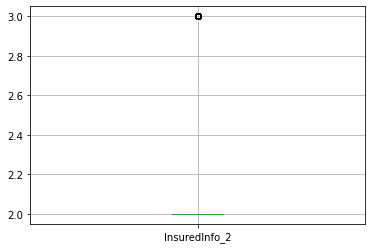

count    59381.000000
mean         2.007427
std          0.085858
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: InsuredInfo_2, dtype: float64
Skewness:  11.474533875946808


Column:  InsuredInfo_3


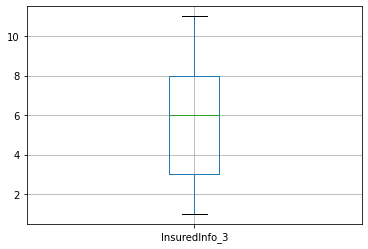

count    59381.000000
mean         5.835840
std          2.674536
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10829206979812836


Column:  InsuredInfo_4


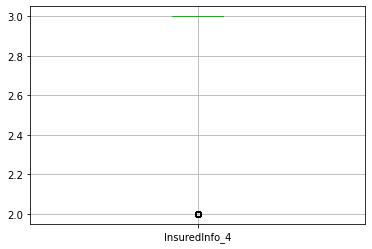

count    59381.000000
mean         2.883666
std          0.320627
min          2.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.3933060224896985


Column:  InsuredInfo_5


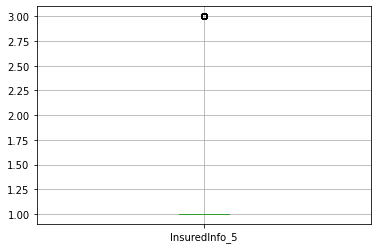

count    59381.000000
mean         1.027180
std          0.231566
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_5, dtype: float64
Skewness:  8.402365629626951


Column:  InsuredInfo_6


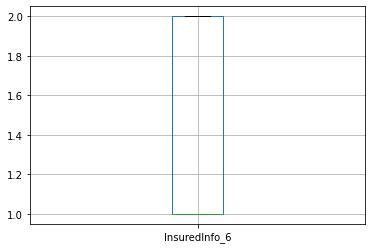

count    59381.000000
mean         1.409188
std          0.491688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: InsuredInfo_6, dtype: float64
Skewness:  0.36940051332325


Column:  InsuredInfo_7


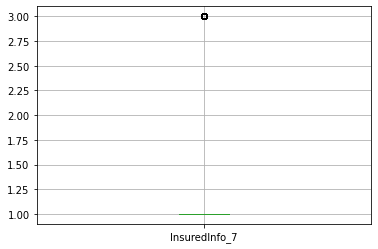

count    59381.000000
mean         1.038531
std          0.274915
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_7, dtype: float64
Skewness:  6.99489701982219


Column:  Insurance_History_1


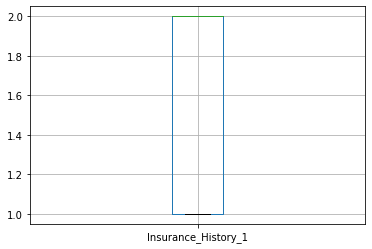

count    59381.000000
mean         1.727606
std          0.445195
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Insurance_History_1, dtype: float64
Skewness:  -1.0225367086751107


Column:  Insurance_History_2


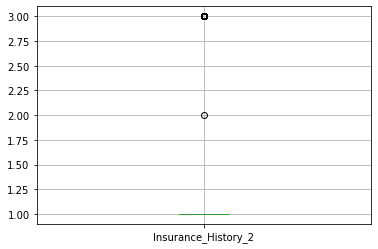

count    59381.000000
mean         1.055792
std          0.329328
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Insurance_History_2, dtype: float64
Skewness:  5.733901412165716


Column:  Insurance_History_3


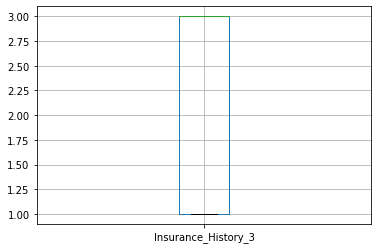

count    59381.000000
mean         2.146983
std          0.989139
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2972014102879703


Column:  Insurance_History_4


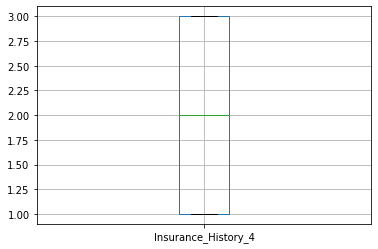

count    59381.000000
mean         1.958707
std          0.945739
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_4, dtype: float64
Skewness:  0.0822549371838283


Column:  Insurance_History_5


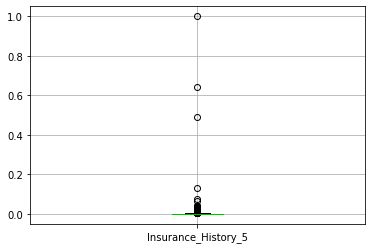

count    59381.000000
mean         0.001733
std          0.005551
min          0.000000
25%          0.000667
50%          0.001733
75%          0.001733
max          1.000000
Name: Insurance_History_5, dtype: float64
Skewness:  135.64482927683792


Column:  Insurance_History_7


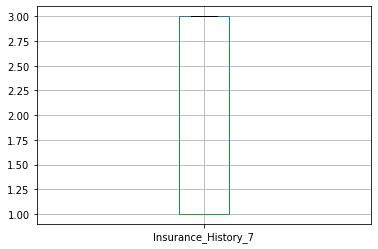

count    59381.000000
mean         1.901989
std          0.971223
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Insurance_History_7, dtype: float64
Skewness:  0.19679415616574578


Column:  Insurance_History_8


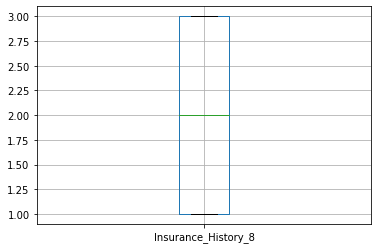

count    59381.000000
mean         2.048484
std          0.755149
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_8, dtype: float64
Skewness:  -0.08028808706123916


Column:  Insurance_History_9


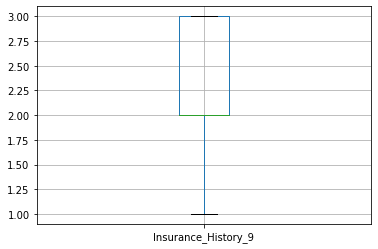

count    59381.000000
mean         2.419360
std          0.509577
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_9, dtype: float64
Skewness:  0.14308556984823534


Column:  Family_Hist_1


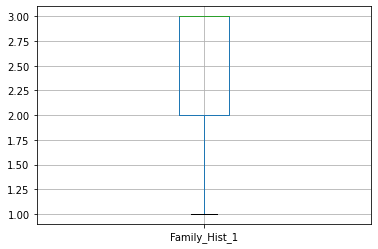

count    59381.000000
mean         2.686230
std          0.483159
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0418239409439525


Column:  Family_Hist_2


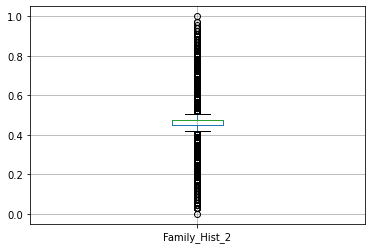

count    59381.000000
mean         0.474550
std          0.111464
min          0.000000
25%          0.449275
50%          0.474550
75%          0.474550
max          1.000000
Name: Family_Hist_2, dtype: float64
Skewness:  0.29485711424018335


Column:  Family_Hist_3


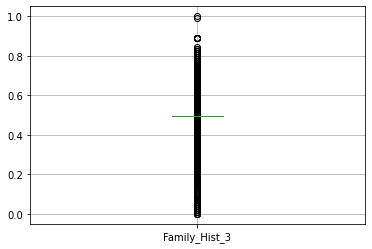

count    59381.000000
mean         0.497737
std          0.091214
min          0.000000
25%          0.497737
50%          0.497737
75%          0.497737
max          1.000000
Name: Family_Hist_3, dtype: float64
Skewness:  -0.8734219423730446


Column:  Family_Hist_4


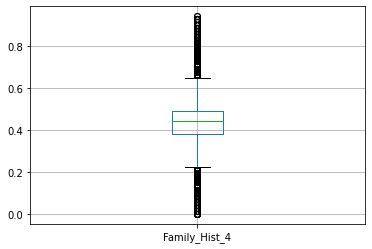

count    59381.000000
mean         0.444890
std          0.134119
min          0.000000
25%          0.380282
50%          0.444890
75%          0.492958
max          0.943662
Name: Family_Hist_4, dtype: float64
Skewness:  0.2516524016373548


Column:  Family_Hist_5


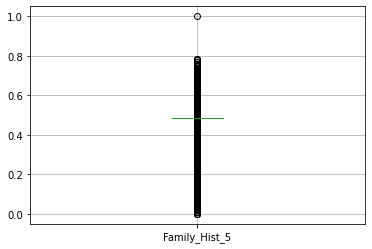

count    59381.000000
mean         0.484635
std          0.070277
min          0.000000
25%          0.484635
50%          0.484635
75%          0.484635
max          1.000000
Name: Family_Hist_5, dtype: float64
Skewness:  -1.3391441846489476


Column:  Medical_History_1


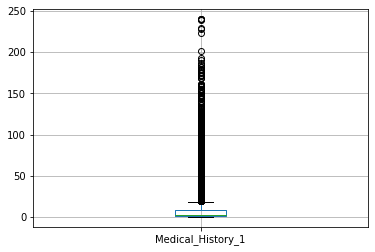

count    59381.000000
mean         6.919974
std         12.267196
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        240.000000
Name: Medical_History_1, dtype: float64
Skewness:  5.967319058220132


Column:  Medical_History_2


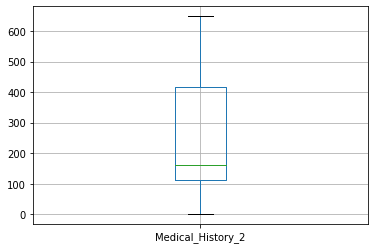

count    59381.000000
mean       253.987100
std        178.621154
min          1.000000
25%        112.000000
50%        162.000000
75%        418.000000
max        648.000000
Name: Medical_History_2, dtype: float64
Skewness:  0.5939859106926527


Column:  Medical_History_3


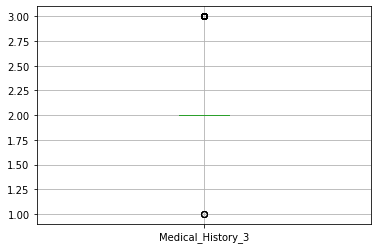

count    59381.000000
mean         2.102171
std          0.303098
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_3, dtype: float64
Skewness:  2.6198459094735047


Column:  Medical_History_4


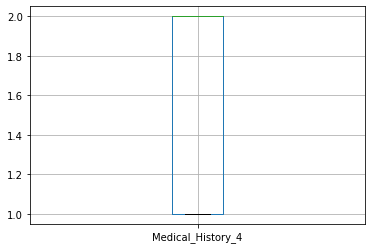

count    59381.000000
mean         1.654873
std          0.475414
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Medical_History_4, dtype: float64
Skewness:  -0.6515503098011224


Column:  Medical_History_5


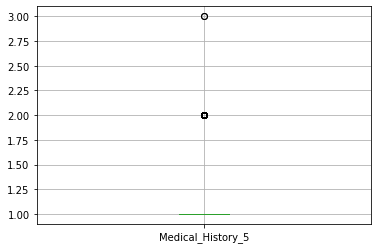

count    59381.000000
mean         1.007359
std          0.085864
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_5, dtype: float64
Skewness:  11.687375704053036


Column:  Medical_History_6


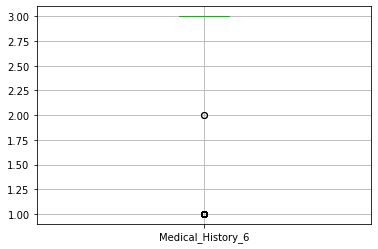

count    59381.000000
mean         2.889897
std          0.456128
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_6, dtype: float64
Skewness:  -3.9017828664374794


Column:  Medical_History_7


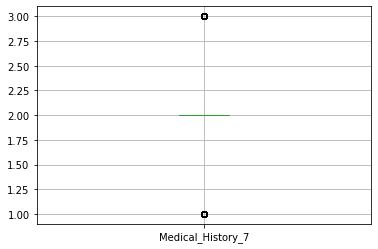

count    59381.000000
mean         2.012277
std          0.172360
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_7, dtype: float64
Skewness:  2.1836557151380105


Column:  Medical_History_8


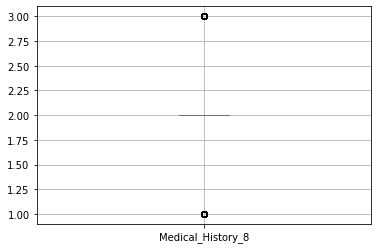

count    59381.000000
mean         2.044088
std          0.291353
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_8, dtype: float64
Skewness:  1.3252768886036914


Column:  Medical_History_9


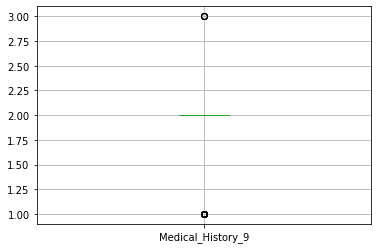

count    59381.000000
mean         1.769943
std          0.421032
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_9, dtype: float64
Skewness:  -1.2801145207240956


Column:  Medical_History_10


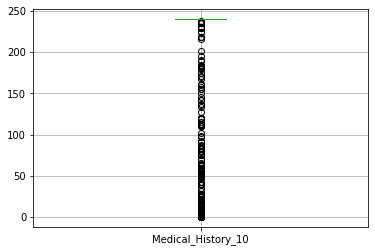

count    59381.000000
mean       239.072481
std         14.127452
min          0.000000
25%        240.000000
50%        240.000000
75%        240.000000
max        240.000000
Name: Medical_History_10, dtype: float64
Skewness:  -15.742163245569728


Column:  Medical_History_11


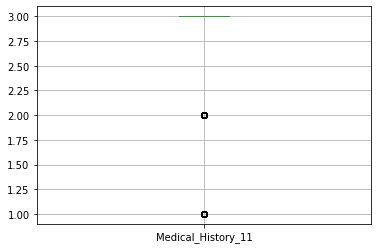

count    59381.000000
mean         2.993836
std          0.095340
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_11, dtype: float64
Skewness:  -17.17939866437908


Column:  Medical_History_12


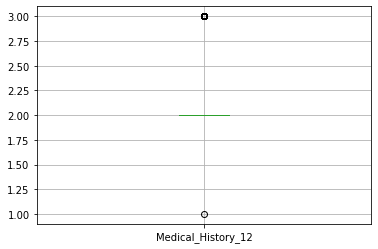

count    59381.000000
mean         2.056601
std          0.231153
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_12, dtype: float64
Skewness:  3.83366834208999


Column:  Medical_History_13


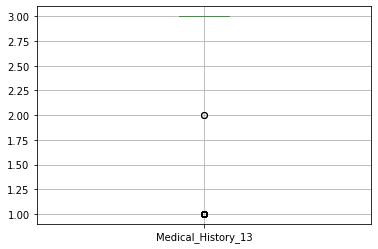

count    59381.000000
mean         2.768141
std          0.640259
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_13, dtype: float64
Skewness:  -2.3994512621755315


Column:  Medical_History_14


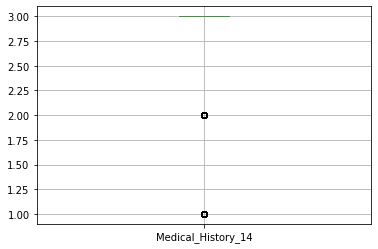

count    59381.000000
mean         2.968542
std          0.197715
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_14, dtype: float64
Skewness:  -6.935922283746267


Column:  Medical_History_15


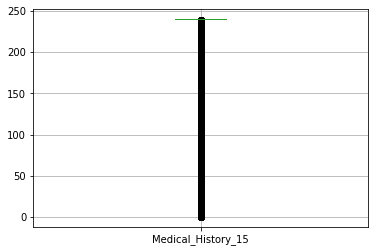

count    59381.000000
mean       211.058184
std         70.306279
min          0.000000
25%        240.000000
50%        240.000000
75%        240.000000
max        240.000000
Name: Medical_History_15, dtype: float64
Skewness:  -2.2336231716077557


Column:  Medical_History_16


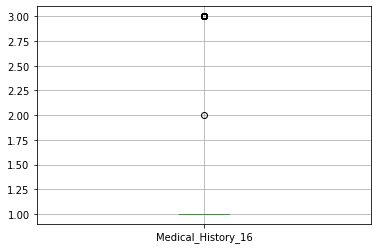

count    59381.000000
mean         1.327529
std          0.740118
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_16, dtype: float64
Skewness:  1.81723185034176


Column:  Medical_History_17


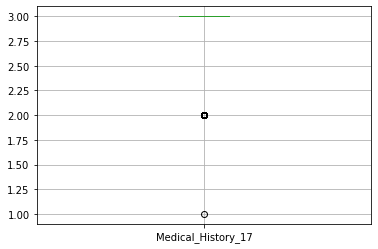

count    59381.000000
mean         2.978006
std          0.146778
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_17, dtype: float64
Skewness:  -6.53459683194376


Column:  Medical_History_18


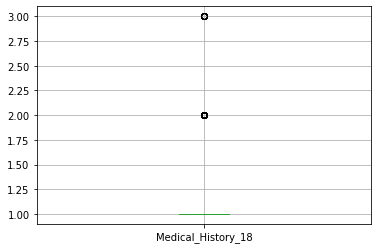

count    59381.000000
mean         1.053536
std          0.225848
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_18, dtype: float64
Skewness:  4.010719068124582


Column:  Medical_History_19


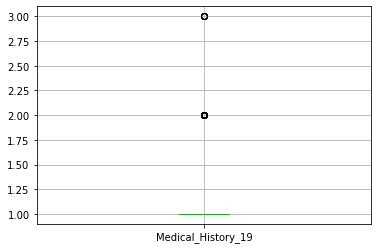

count    59381.000000
mean         1.034455
std          0.182859
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_19, dtype: float64
Skewness:  5.1461644894478935


Column:  Medical_History_20


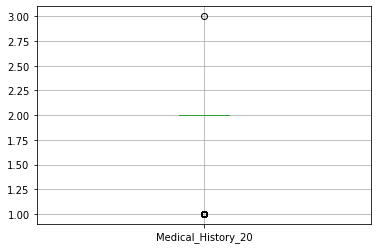

count    59381.000000
mean         1.985079
std          0.121375
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_20, dtype: float64
Skewness:  -7.974217289980639


Column:  Medical_History_21


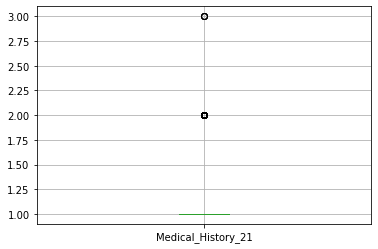

count    59381.000000
mean         1.108991
std          0.311847
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_21, dtype: float64
Skewness:  2.5161846527968295


Column:  Medical_History_22


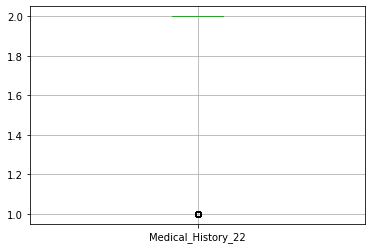

count    59381.000000
mean         1.981644
std          0.134236
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Medical_History_22, dtype: float64
Skewness:  -7.176300072286352


Column:  Medical_History_23


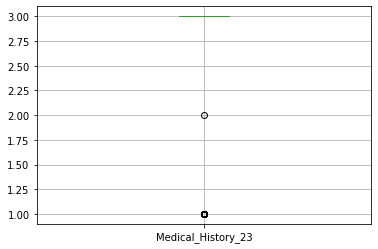

count    59381.000000
mean         2.528115
std          0.849170
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_23, dtype: float64
Skewness:  -1.2438655069271336


Column:  Medical_History_24


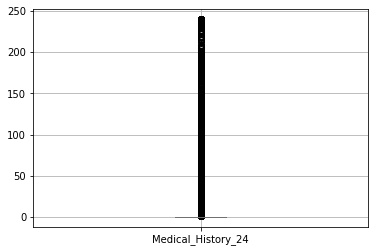

count    59381.000000
mean         3.241205
std         23.333461
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        240.000000
Name: Medical_History_24, dtype: float64
Skewness:  8.650871989989371


Column:  Medical_History_25


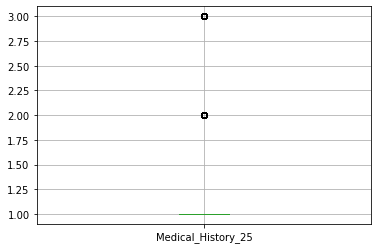

count    59381.000000
mean         1.194961
std          0.406082
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_25, dtype: float64
Skewness:  1.7166689684627388


Column:  Medical_History_26


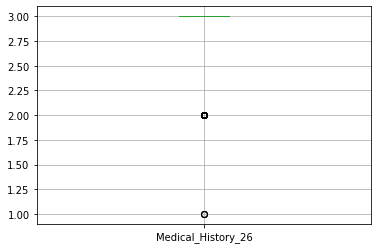

count    59381.000000
mean         2.808979
std          0.393237
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_26, dtype: float64
Skewness:  -1.5745245542775128


Column:  Medical_History_27


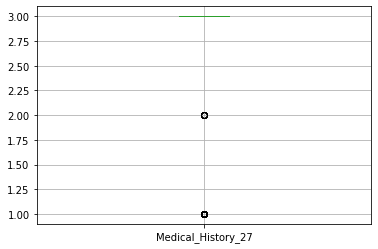

count    59381.000000
mean         2.980213
std          0.197652
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_27, dtype: float64
Skewness:  -9.903954841249414


Column:  Medical_History_28


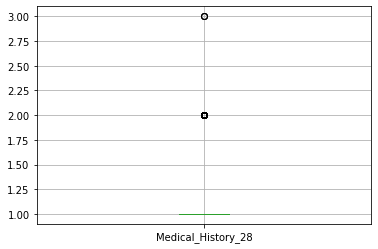

count    59381.000000
mean         1.067210
std          0.250589
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_28, dtype: float64
Skewness:  3.466706263813059


Column:  Medical_History_29


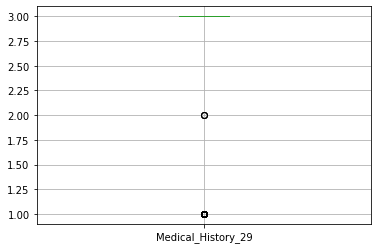

count    59381.000000
mean         2.542699
std          0.839904
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_29, dtype: float64
Skewness:  -1.2922844971581418


Column:  Medical_History_30


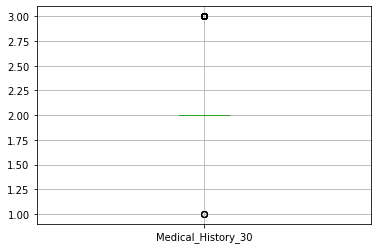

count    59381.000000
mean         2.040771
std          0.198100
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_30, dtype: float64
Skewness:  4.618449514609161


Column:  Medical_History_31


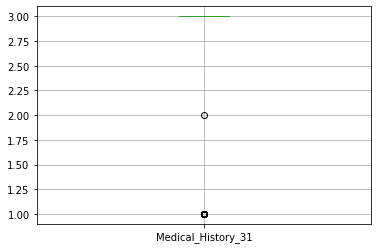

count    59381.000000
mean         2.985265
std          0.170989
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_31, dtype: float64
Skewness:  -11.521375594656496


Column:  Medical_History_32


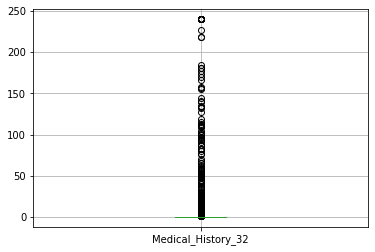

count    59381.000000
mean         0.223068
std          5.526499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        240.000000
Name: Medical_History_32, dtype: float64
Skewness:  33.7735765626507


Column:  Medical_History_33


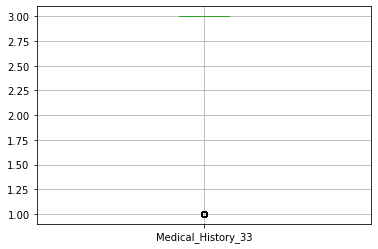

count    59381.000000
mean         2.804618
std          0.593798
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_33, dtype: float64
Skewness:  -2.710161922809635


Column:  Medical_History_34


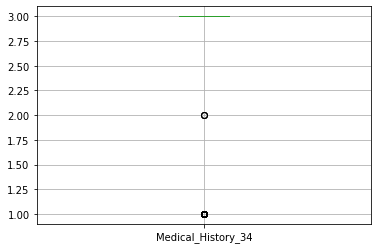

count    59381.000000
mean         2.689076
std          0.724661
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_34, dtype: float64
Skewness:  -1.9017609545070016


Column:  Medical_History_35


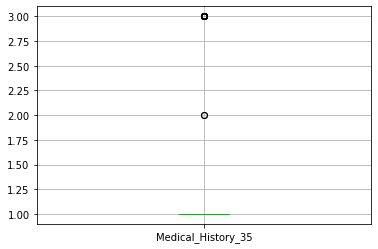

count    59381.000000
mean         1.002055
std          0.063806
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_35, dtype: float64
Skewness:  31.152197268619222


Column:  Medical_History_36


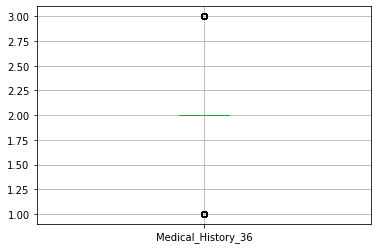

count    59381.000000
mean         2.179468
std          0.412633
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_36, dtype: float64
Skewness:  1.1674384099363653


Column:  Medical_History_37


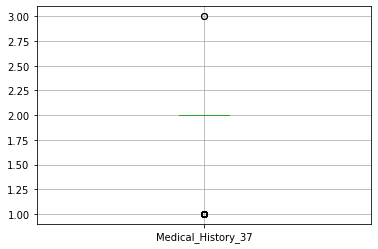

count    59381.000000
mean         1.938398
std          0.240574
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_37, dtype: float64
Skewness:  -3.6395894620489146


Column:  Medical_History_38


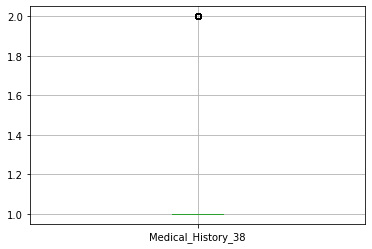

count    59381.000000
mean         1.004850
std          0.069474
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Medical_History_38, dtype: float64
Skewness:  14.254794535936009


Column:  Medical_History_39


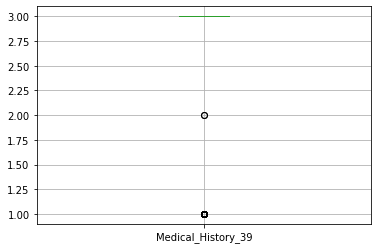

count    59381.000000
mean         2.830720
std          0.556665
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_39, dtype: float64
Skewness:  -2.9845735660152726


Column:  Medical_History_40


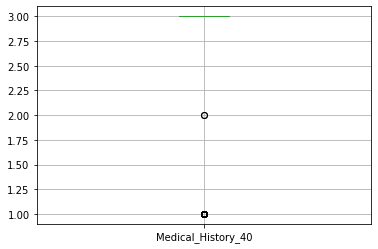

count    59381.000000
mean         2.967599
std          0.252427
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_40, dtype: float64
Skewness:  -7.664596145149692


Column:  Medical_History_41


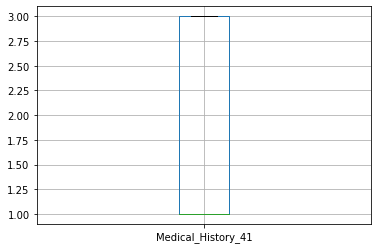

count    59381.000000
mean         1.641064
std          0.933361
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Medical_History_41, dtype: float64
Skewness:  0.7691451197703993


Column:  Medical_Keyword_1


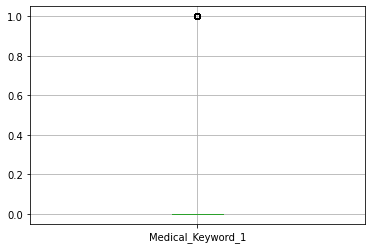

count    59381.000000
mean         0.042000
std          0.200591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_1, dtype: float64
Skewness:  4.5666659378491845


Column:  Medical_Keyword_2


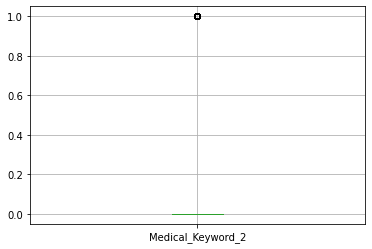

count    59381.000000
mean         0.008942
std          0.094141
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_2, dtype: float64
Skewness:  10.432791909731312


Column:  Medical_Keyword_3


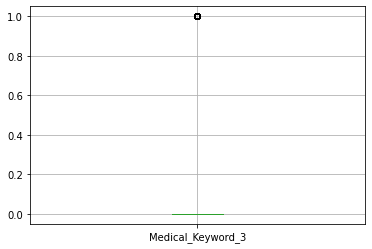

count    59381.000000
mean         0.049275
std          0.216443
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_3, dtype: float64
Skewness:  4.164968625110455


Column:  Medical_Keyword_4


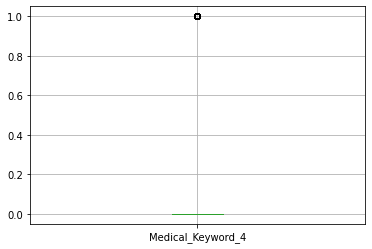

count    59381.000000
mean         0.014550
std          0.119744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_4, dtype: float64
Skewness:  8.108396620359576


Column:  Medical_Keyword_5


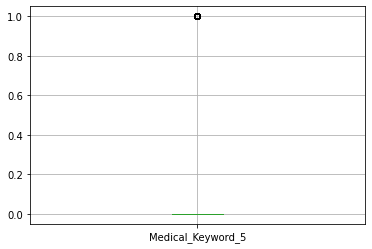

count    59381.000000
mean         0.008622
std          0.092456
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_5, dtype: float64
Skewness:  10.629812858612603


Column:  Medical_Keyword_6


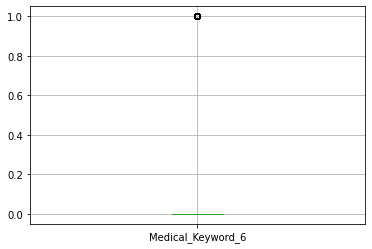

count    59381.000000
mean         0.012597
std          0.111526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_6, dtype: float64
Skewness:  8.74087987028413


Column:  Medical_Keyword_7


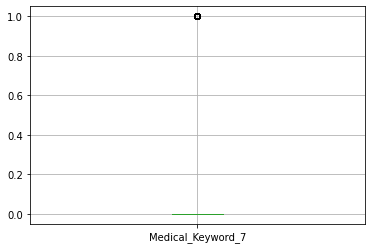

count    59381.000000
mean         0.013910
std          0.117119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_7, dtype: float64
Skewness:  8.301049221080795


Column:  Medical_Keyword_8


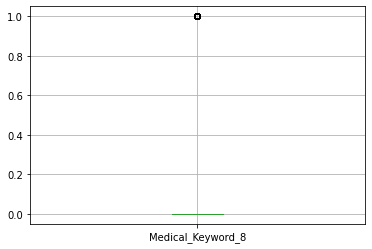

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_8, dtype: float64
Skewness:  9.648884955654573


Column:  Medical_Keyword_9


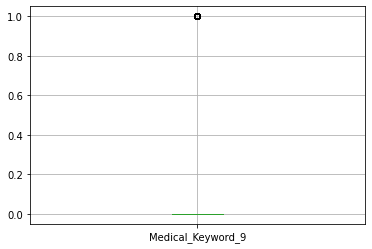

count    59381.000000
mean         0.006652
std          0.081289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_9, dtype: float64
Skewness:  12.138607256170813


Column:  Medical_Keyword_10


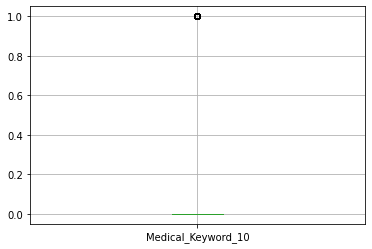

count    59381.000000
mean         0.036459
std          0.187432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_10, dtype: float64
Skewness:  4.9463914904411315


Column:  Medical_Keyword_11


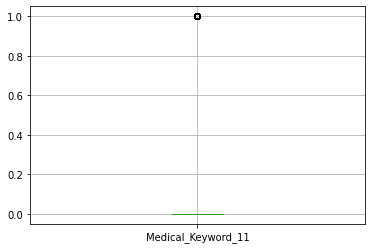

count    59381.000000
mean         0.058015
std          0.233774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_11, dtype: float64
Skewness:  3.7814250849496482


Column:  Medical_Keyword_12


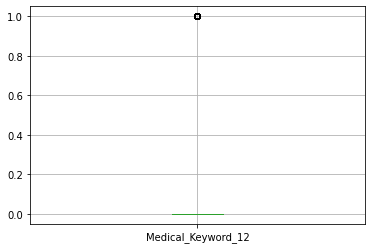

count    59381.000000
mean         0.010003
std          0.099515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_12, dtype: float64
Skewness:  9.847995603913516


Column:  Medical_Keyword_13


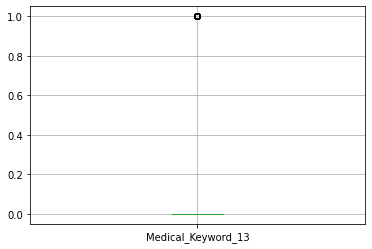

count    59381.000000
mean         0.005962
std          0.076981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_13, dtype: float64
Skewness:  12.835780412504183


Column:  Medical_Keyword_14


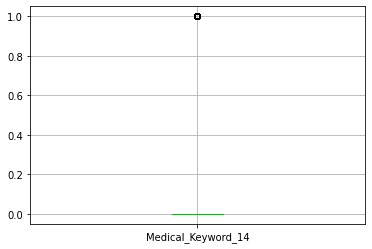

count    59381.000000
mean         0.007848
std          0.088239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_14, dtype: float64
Skewness:  11.155323178356184


Column:  Medical_Keyword_15


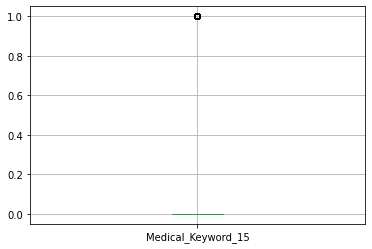

count    59381.000000
mean         0.190465
std          0.392671
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_15, dtype: float64
Skewness:  1.5766141021995717


Column:  Medical_Keyword_16


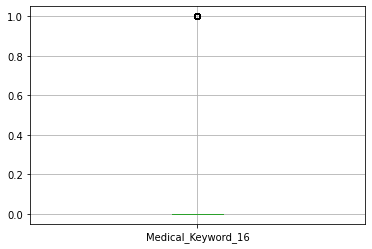

count    59381.000000
mean         0.012715
std          0.112040
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_16, dtype: float64
Skewness:  8.698679907869543


Column:  Medical_Keyword_17


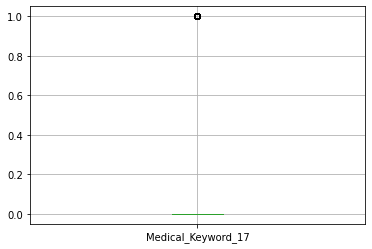

count    59381.000000
mean         0.009161
std          0.095275
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_17, dtype: float64
Skewness:  10.303924482105579


Column:  Medical_Keyword_18


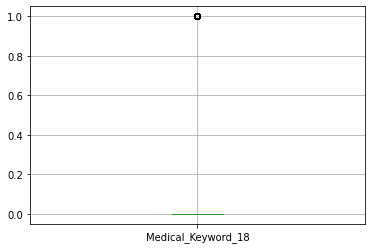

count    59381.000000
mean         0.007494
std          0.086244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_18, dtype: float64
Skewness:  11.421671974293576


Column:  Medical_Keyword_19


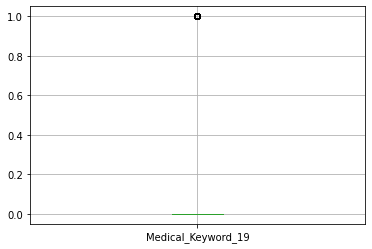

count    59381.000000
mean         0.009296
std          0.095967
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_19, dtype: float64
Skewness:  10.226873540823748


Column:  Medical_Keyword_20


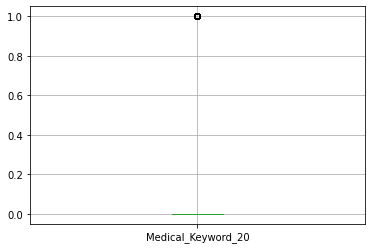

count    59381.000000
mean         0.008134
std          0.089821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_20, dtype: float64
Skewness:  10.95245588470808


Column:  Medical_Keyword_21


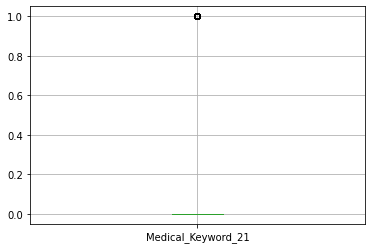

count    59381.000000
mean         0.014601
std          0.119949
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_21, dtype: float64
Skewness:  8.093721182897697


Column:  Medical_Keyword_22


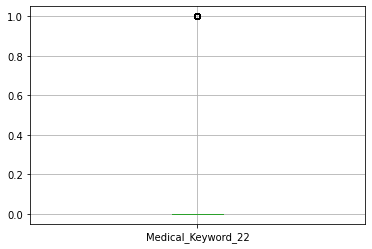

count    59381.000000
mean         0.037167
std          0.189172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_22, dtype: float64
Skewness:  4.893420647372886


Column:  Medical_Keyword_23


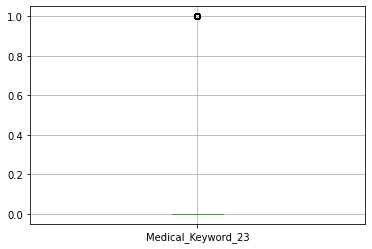

count    59381.000000
mean         0.097775
std          0.297013
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_23, dtype: float64
Skewness:  2.7085541029554148


Column:  Medical_Keyword_24


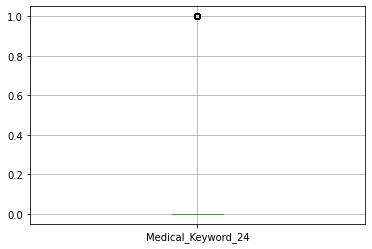

count    59381.000000
mean         0.018895
std          0.136155
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_24, dtype: float64
Skewness:  7.067250142075075


Column:  Medical_Keyword_25


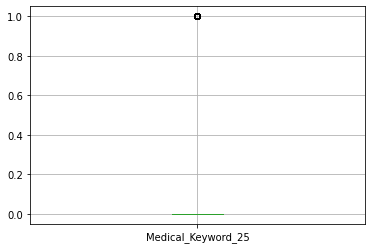

count    59381.000000
mean         0.089456
std          0.285404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_25, dtype: float64
Skewness:  2.877032346250007


Column:  Medical_Keyword_26


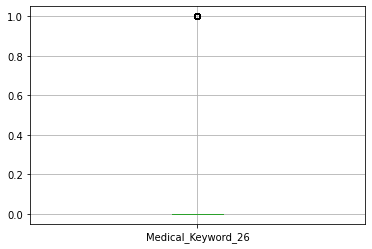

count    59381.000000
mean         0.013439
std          0.115145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_26, dtype: float64
Skewness:  8.45159813798485


Column:  Medical_Keyword_27


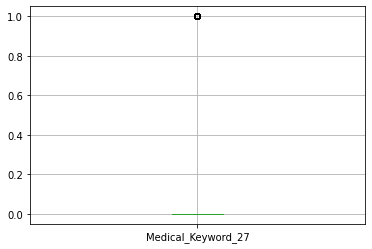

count    59381.000000
mean         0.011856
std          0.108237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_27, dtype: float64
Skewness:  9.020206197261881


Column:  Medical_Keyword_28


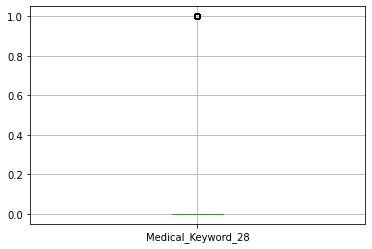

count    59381.000000
mean         0.014937
std          0.121304
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_28, dtype: float64
Skewness:  7.997767218968926


Column:  Medical_Keyword_29


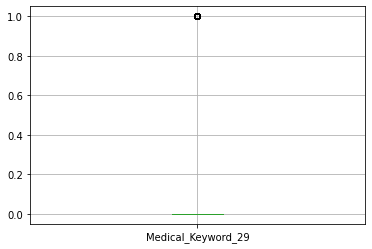

count    59381.000000
mean         0.011755
std          0.107780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_29, dtype: float64
Skewness:  9.06030394281217


Column:  Medical_Keyword_30


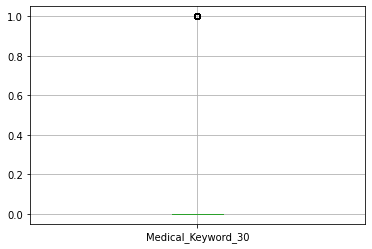

count    59381.000000
mean         0.025042
std          0.156253
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_30, dtype: float64
Skewness:  6.079553863105806


Column:  Medical_Keyword_31


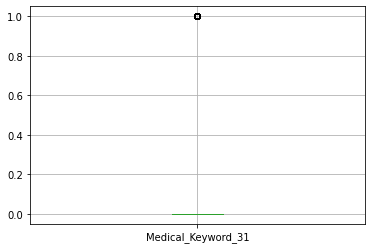

count    59381.000000
mean         0.010896
std          0.103813
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_31, dtype: float64
Skewness:  9.423082385969868


Column:  Medical_Keyword_32


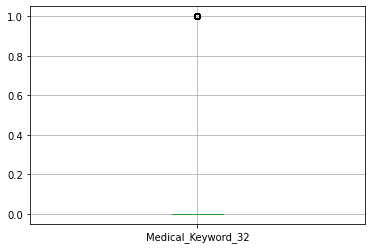

count    59381.000000
mean         0.021168
std          0.143947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_32, dtype: float64
Skewness:  6.653128363192594


Column:  Medical_Keyword_33


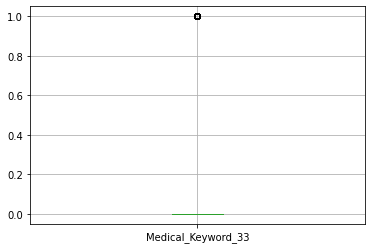

count    59381.000000
mean         0.022836
std          0.149380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_33, dtype: float64
Skewness:  6.388797169381426


Column:  Medical_Keyword_34


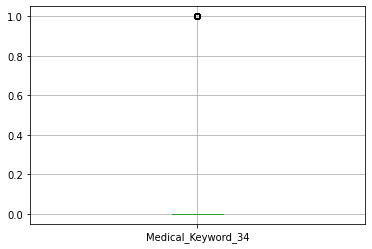

count    59381.000000
mean         0.020646
std          0.142198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_34, dtype: float64
Skewness:  6.742264109637791


Column:  Medical_Keyword_35


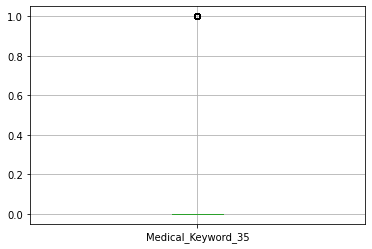

count    59381.000000
mean         0.006938
std          0.083007
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_35, dtype: float64
Skewness:  11.88035176926597


Column:  Medical_Keyword_36


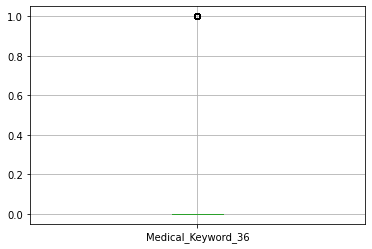

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_36, dtype: float64
Skewness:  9.64888495565458


Column:  Medical_Keyword_37


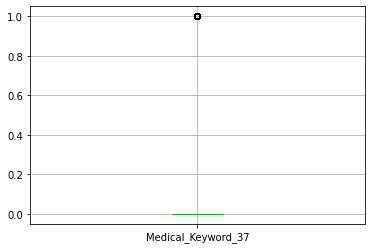

count    59381.000000
mean         0.066587
std          0.249307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_37, dtype: float64
Skewness:  3.477053978141677


Column:  Medical_Keyword_38


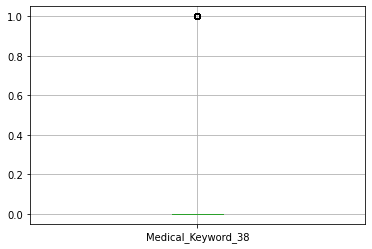

count    59381.000000
mean         0.006837
std          0.082405
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_38, dtype: float64
Skewness:  11.969659278126407


Column:  Medical_Keyword_39


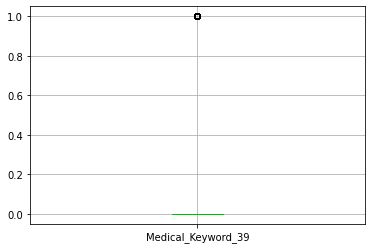

count    59381.000000
mean         0.013658
std          0.116066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_39, dtype: float64
Skewness:  8.38074443186075


Column:  Medical_Keyword_40


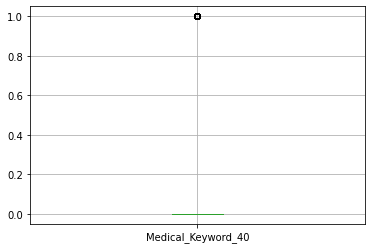

count    59381.000000
mean         0.056954
std          0.231757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_40, dtype: float64
Skewness:  3.82349138600412


Column:  Medical_Keyword_41


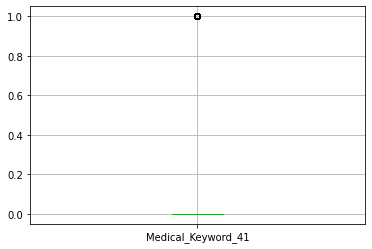

count    59381.000000
mean         0.010054
std          0.099764
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_41, dtype: float64
Skewness:  9.822458539501673


Column:  Medical_Keyword_42


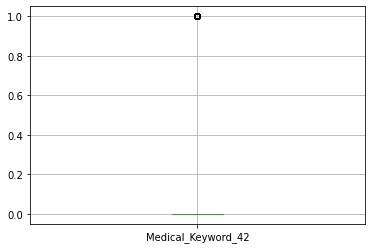

count    59381.000000
mean         0.045536
std          0.208479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_42, dtype: float64
Skewness:  4.35994246504929


Column:  Medical_Keyword_43


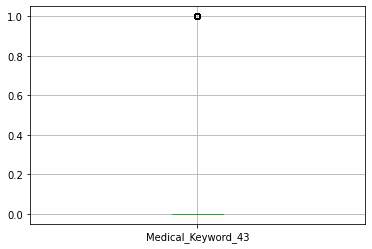

count    59381.000000
mean         0.010710
std          0.102937
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_43, dtype: float64
Skewness:  9.506931409455676


Column:  Medical_Keyword_44


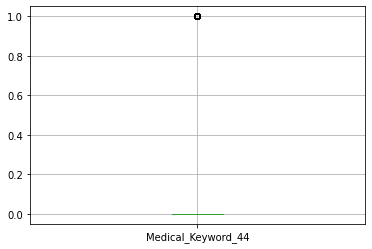

count    59381.000000
mean         0.007528
std          0.086436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_44, dtype: float64
Skewness:  11.395505505541607


Column:  Medical_Keyword_45


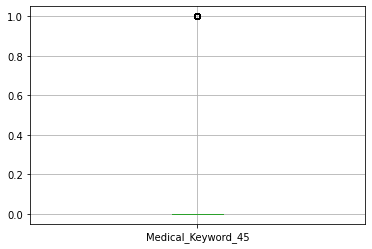

count    59381.000000
mean         0.013691
std          0.116207
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_45, dtype: float64
Skewness:  8.36999289291722


Column:  Medical_Keyword_46


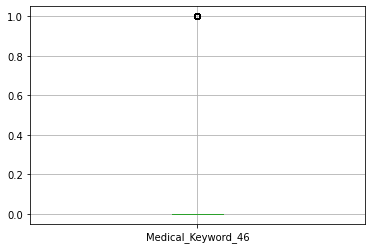

count    59381.000000
mean         0.008488
std          0.091737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_46, dtype: float64
Skewness:  10.716053666043818


Column:  Medical_Keyword_47


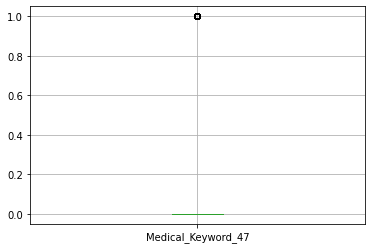

count    59381.000000
mean         0.019905
std          0.139676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_47, dtype: float64
Skewness:  6.874622165948636


Column:  Medical_Keyword_48


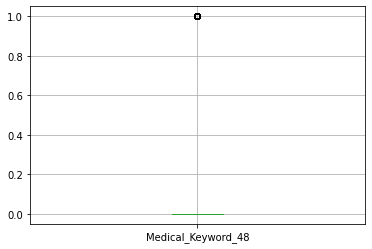

count    59381.000000
mean         0.054496
std          0.226995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_48, dtype: float64
Skewness:  3.9253711340486674




In [33]:
for column in columns:
    dataset.boxplot(column=column)
    print('Column: ', column)
    plt.show()
    print(dataset[column].describe())
    print('Skewness: ', dataset[column].skew())
    print('\n')

-------------------------------------------
Column:  Product_Info_3


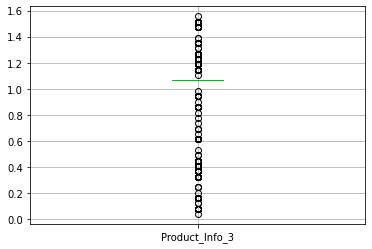

count    59381.000000
mean         1.000000
std          0.207772
min          0.040957
25%          1.064891
50%          1.064891
75%          1.064891
max          1.556378
Name: Product_Info_3, dtype: float64
Skewness:  -2.3762321250568372


Column:  Product_Info_5


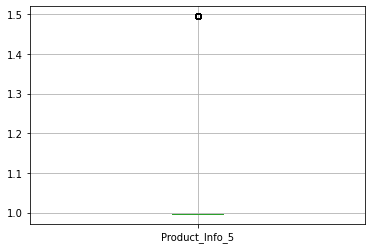

count    59381.000000
mean         1.000000
std          0.041410
min          0.996535
25%          0.996535
50%          0.996535
75%          0.996535
max          1.494802
Name: Product_Info_5, dtype: float64
Skewness:  11.865655390570552


Column:  Product_Info_6


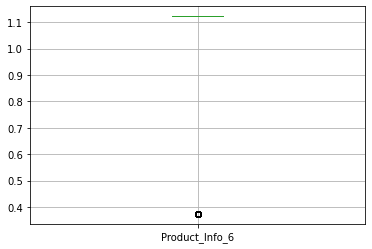

count    59381.000000
mean         1.000000
std          0.276445
min          0.374028
25%          1.122083
50%          1.122083
75%          1.122083
max          1.122083
Name: Product_Info_6, dtype: float64
Skewness:  -1.8228096094843764


Column:  Employment_Info_2


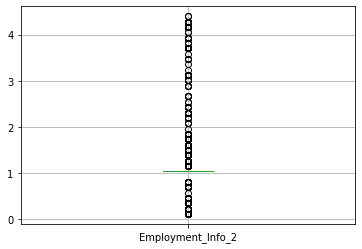

count    59381.000000
mean         1.000000
std          0.489142
min          0.115716
25%          1.041447
50%          1.041447
75%          1.041447
max          4.397221
Name: Employment_Info_2, dtype: float64
Skewness:  0.5634913999800417


Column:  Employment_Info_5


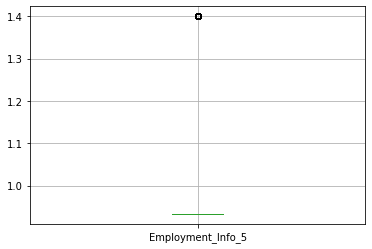

count    59381.000000
mean         1.000000
std          0.163341
min          0.933289
25%          0.933289
50%          0.933289
75%          0.933289
max          1.399934
Name: Employment_Info_5, dtype: float64
Skewness:  2.0401144343150226


Column:  InsuredInfo_2


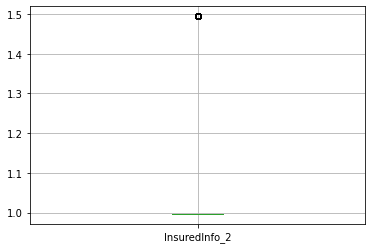

count    59381.000000
mean         1.000000
std          0.042770
min          0.996300
25%          0.996300
50%          0.996300
75%          0.996300
max          1.494451
Name: InsuredInfo_2, dtype: float64
Skewness:  11.474533875946793


Column:  InsuredInfo_3


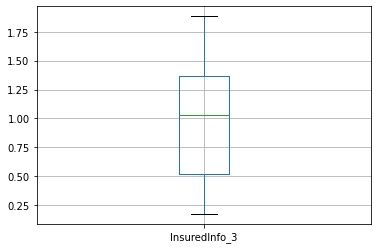

count    59381.000000
mean         1.000000
std          0.458295
min          0.171355
25%          0.514065
50%          1.028130
75%          1.370840
max          1.884904
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10829206979812922


Column:  InsuredInfo_4


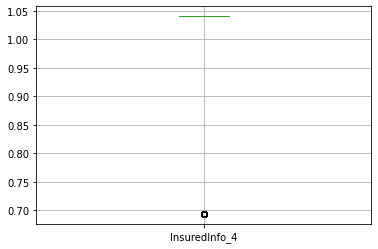

count    59381.000000
mean         1.000000
std          0.111187
min          0.693561
25%          1.040342
50%          1.040342
75%          1.040342
max          1.040342
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.3933060224897065


Column:  Insurance_History_3


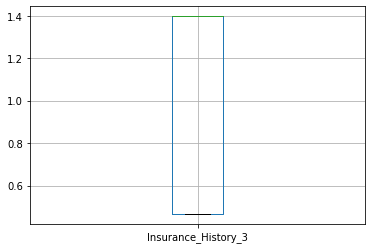

count    59381.000000
mean         1.000000
std          0.460711
min          0.465770
25%          0.465770
50%          1.397310
75%          1.397310
max          1.397310
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2972014102879719


Column:  Insurance_History_8


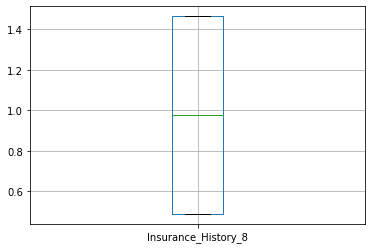

count    59381.000000
mean         1.000000
std          0.368638
min          0.488166
25%          0.488166
50%          0.976332
75%          1.464498
max          1.464498
Name: Insurance_History_8, dtype: float64
Skewness:  -0.080288087061241


Column:  Insurance_History_9


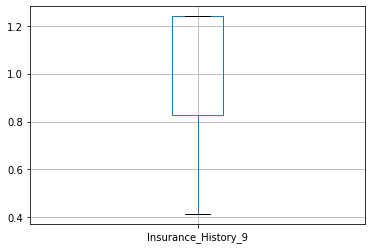

count    59381.000000
mean         1.000000
std          0.210625
min          0.413332
25%          0.826665
50%          0.826665
75%          1.239997
max          1.239997
Name: Insurance_History_9, dtype: float64
Skewness:  0.14308556984823687


Column:  Family_Hist_1


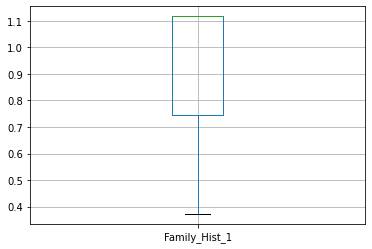

count    59381.000000
mean         1.000000
std          0.179865
min          0.372269
25%          0.744538
50%          1.116807
75%          1.116807
max          1.116807
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0418239409439591


Column:  Medical_History_1


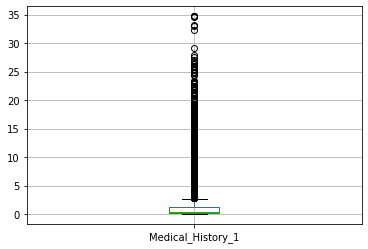

count    59381.000000
mean         1.000000
std          1.772723
min          0.000000
25%          0.144509
50%          0.433528
75%          1.156074
max         34.682209
Name: Medical_History_1, dtype: float64
Skewness:  5.967319058220135


Column:  Medical_History_2


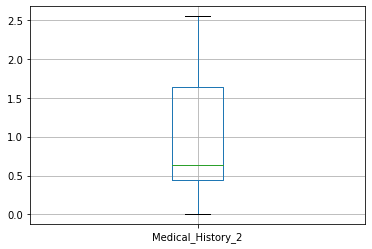

count    59381.000000
mean         1.000000
std          0.703269
min          0.003937
25%          0.440967
50%          0.637828
75%          1.645753
max          2.551311
Name: Medical_History_2, dtype: float64
Skewness:  0.593985910692653


Column:  Medical_History_3


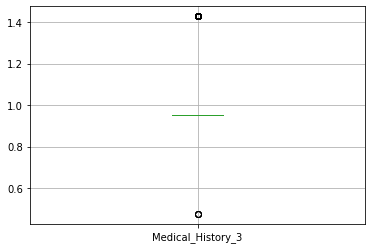

count    59381.000000
mean         1.000000
std          0.144183
min          0.475699
25%          0.951398
50%          0.951398
75%          0.951398
max          1.427096
Name: Medical_History_3, dtype: float64
Skewness:  2.619845909473495


Column:  Medical_History_6


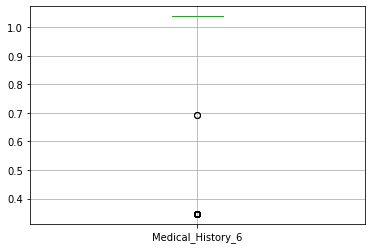

count    59381.000000
mean         1.000000
std          0.157835
min          0.346033
25%          1.038099
50%          1.038099
75%          1.038099
max          1.038099
Name: Medical_History_6, dtype: float64
Skewness:  -3.901782866437478


Column:  Medical_History_7


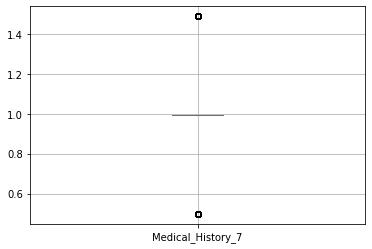

count    59381.000000
mean         1.000000
std          0.085654
min          0.496950
25%          0.993899
50%          0.993899
75%          0.993899
max          1.490849
Name: Medical_History_7, dtype: float64
Skewness:  2.1836557151380003


Column:  Medical_History_8


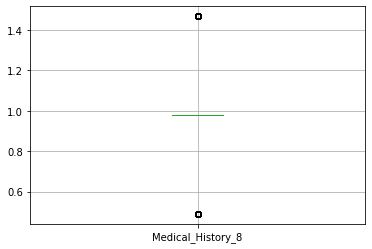

count    59381.000000
mean         1.000000
std          0.142535
min          0.489216
25%          0.978431
50%          0.978431
75%          0.978431
max          1.467647
Name: Medical_History_8, dtype: float64
Skewness:  1.3252768886036903


Column:  Medical_History_10


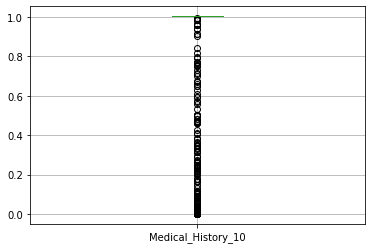

count    59381.000000
mean         1.000000
std          0.059093
min          0.000000
25%          1.003880
50%          1.003880
75%          1.003880
max          1.003880
Name: Medical_History_10, dtype: float64
Skewness:  -15.742163245569728


Column:  Medical_History_11


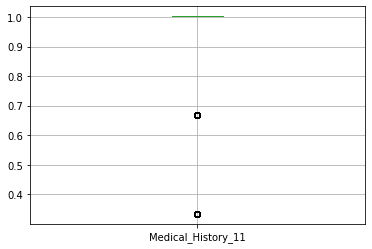

count    59381.000000
mean         1.000000
std          0.031845
min          0.334020
25%          1.002059
50%          1.002059
75%          1.002059
max          1.002059
Name: Medical_History_11, dtype: float64
Skewness:  -17.17939866437907


Column:  Medical_History_12


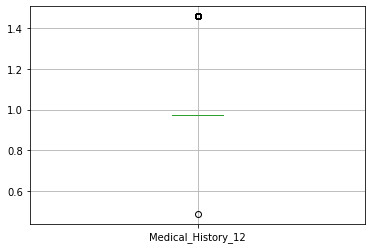

count    59381.000000
mean         1.000000
std          0.112396
min          0.486239
25%          0.972479
50%          0.972479
75%          0.972479
max          1.458718
Name: Medical_History_12, dtype: float64
Skewness:  3.8336683420899815


Column:  Medical_History_13


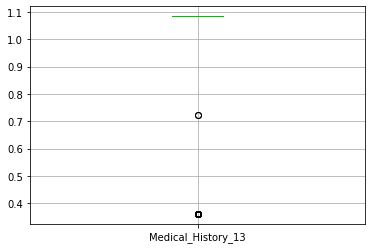

count    59381.000000
mean         1.000000
std          0.231296
min          0.361253
25%          1.083760
50%          1.083760
75%          1.083760
max          1.083760
Name: Medical_History_13, dtype: float64
Skewness:  -2.3994512621755395


Column:  Medical_History_14


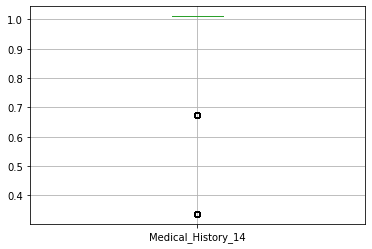

count    59381.000000
mean         1.000000
std          0.066603
min          0.336866
25%          1.010597
50%          1.010597
75%          1.010597
max          1.010597
Name: Medical_History_14, dtype: float64
Skewness:  -6.935922283746281


Column:  Medical_History_15


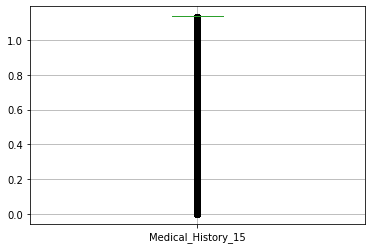

count    59381.000000
mean         1.000000
std          0.333113
min          0.000000
25%          1.137127
50%          1.137127
75%          1.137127
max          1.137127
Name: Medical_History_15, dtype: float64
Skewness:  -2.233623171607753


Column:  Medical_History_17


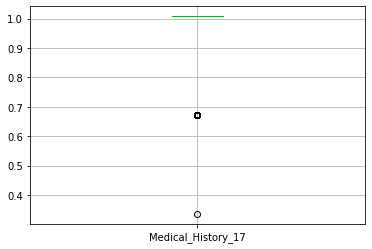

count    59381.000000
mean         1.000000
std          0.049287
min          0.335795
25%          1.007385
50%          1.007385
75%          1.007385
max          1.007385
Name: Medical_History_17, dtype: float64
Skewness:  -6.53459683194376


Column:  Medical_History_23


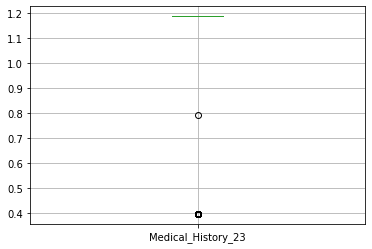

count    59381.000000
mean         1.000000
std          0.335891
min          0.395552
25%          1.186655
50%          1.186655
75%          1.186655
max          1.186655
Name: Medical_History_23, dtype: float64
Skewness:  -1.2438655069271316


Column:  Medical_History_24


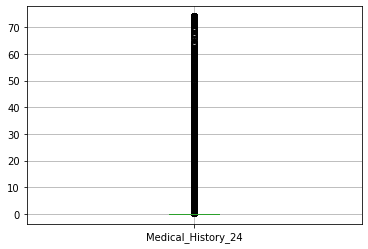

count    59381.000000
mean         1.000000
std          7.199008
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         74.046533
Name: Medical_History_24, dtype: float64
Skewness:  8.650871989989371


Column:  Medical_History_26


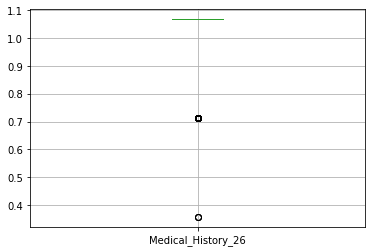

count    59381.000000
mean         1.000000
std          0.139993
min          0.356001
25%          1.068004
50%          1.068004
75%          1.068004
max          1.068004
Name: Medical_History_26, dtype: float64
Skewness:  -1.5745245542775173


Column:  Medical_History_27


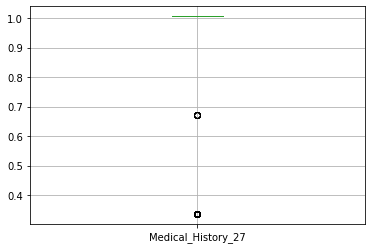

count    59381.000000
mean         1.000000
std          0.066321
min          0.335547
25%          1.006640
50%          1.006640
75%          1.006640
max          1.006640
Name: Medical_History_27, dtype: float64
Skewness:  -9.903954841249439


Column:  Medical_History_29


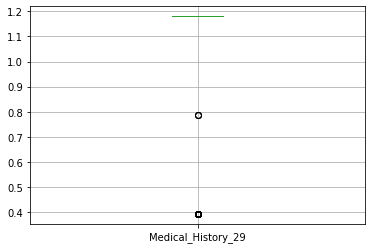

count    59381.000000
mean         1.000000
std          0.330320
min          0.393283
25%          1.179849
50%          1.179849
75%          1.179849
max          1.179849
Name: Medical_History_29, dtype: float64
Skewness:  -1.292284497158141


Column:  Medical_History_30


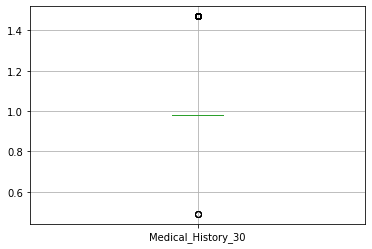

count    59381.000000
mean         1.000000
std          0.097071
min          0.490011
25%          0.980022
50%          0.980022
75%          0.980022
max          1.470033
Name: Medical_History_30, dtype: float64
Skewness:  4.618449514609167


Column:  Medical_History_31


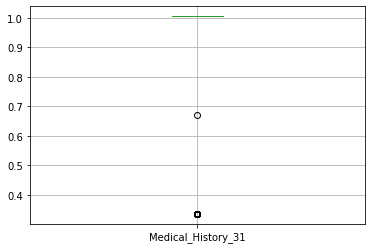

count    59381.000000
mean         1.000000
std          0.057278
min          0.334979
25%          1.004936
50%          1.004936
75%          1.004936
max          1.004936
Name: Medical_History_31, dtype: float64
Skewness:  -11.5213755946565


Column:  Medical_History_33


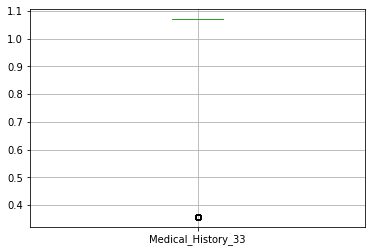

count    59381.000000
mean         1.000000
std          0.211722
min          0.356555
25%          1.069665
50%          1.069665
75%          1.069665
max          1.069665
Name: Medical_History_33, dtype: float64
Skewness:  -2.7101619228096316


Column:  Medical_History_34


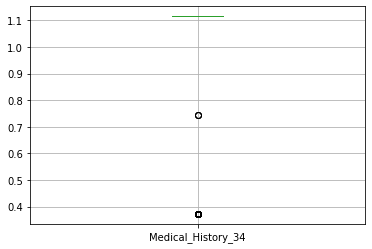

count    59381.000000
mean         1.000000
std          0.269483
min          0.371875
25%          1.115625
50%          1.115625
75%          1.115625
max          1.115625
Name: Medical_History_34, dtype: float64
Skewness:  -1.9017609545069998


Column:  Medical_History_36


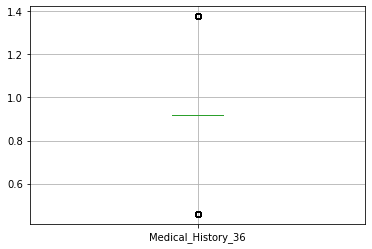

count    59381.000000
mean         1.000000
std          0.189328
min          0.458828
25%          0.917655
50%          0.917655
75%          0.917655
max          1.376483
Name: Medical_History_36, dtype: float64
Skewness:  1.1674384099363646


Column:  Medical_History_39


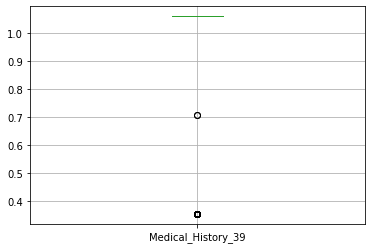

count    59381.000000
mean         1.000000
std          0.196651
min          0.353267
25%          1.059801
50%          1.059801
75%          1.059801
max          1.059801
Name: Medical_History_39, dtype: float64
Skewness:  -2.984573566015268


Column:  Medical_History_40


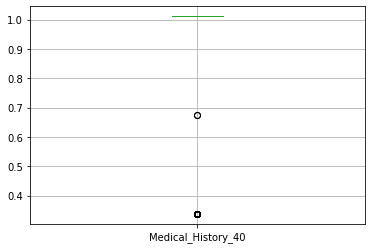

count    59381.000000
mean         1.000000
std          0.085061
min          0.336973
25%          1.010918
50%          1.010918
75%          1.010918
max          1.010918
Name: Medical_History_40, dtype: float64
Skewness:  -7.664596145149707




In [34]:
print("-------------------------------------------")
for column in columns:
    if dataset[column].mean() > 2:
        dataset[column] = dataset[column]/dataset[column].mean()
        dataset.boxplot(column=column)
        print('Column: ', column)
        plt.show()
        print(dataset[column].describe())
        print('Skewness: ', dataset[column].skew())
        print('\n')

# mean transformation to reduce variance

-------------------------------------------
Column:  Product_Info_1


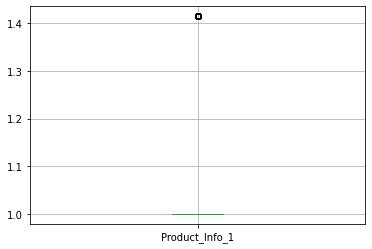

count    59381.000000
mean         1.010917
std          0.066353
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.414214
Name: Product_Info_1, dtype: float64
Skewness:  5.9137100400759754


Column:  Product_Info_3


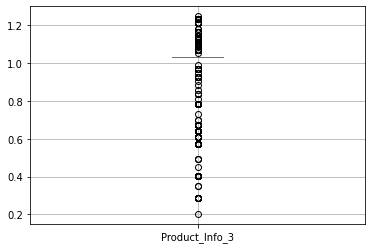

count    59381.000000
mean         0.992320
std          0.123699
min          0.202379
25%          1.031935
50%          1.031935
75%          1.031935
max          1.247549
Name: Product_Info_3, dtype: float64
Skewness:  -2.482757851555155


Column:  Product_Info_5


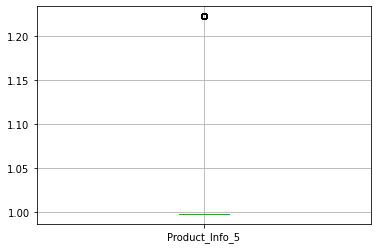

count    59381.000000
mean         0.999826
std          0.018646
min          0.998266
25%          0.998266
50%          0.998266
75%          0.998266
max          1.222621
Name: Product_Info_5, dtype: float64
Skewness:  11.865655390570591


Column:  Product_Info_7


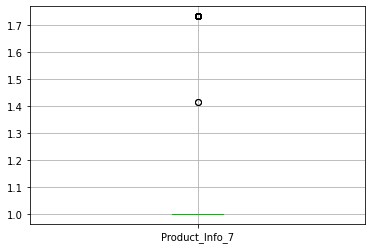

count    59381.000000
mean         1.015954
std          0.106866
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Product_Info_7, dtype: float64
Skewness:  6.5503412156067204


Column:  Employment_Info_1


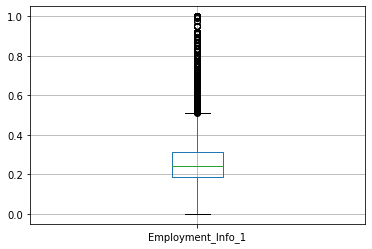

count    59381.000000
mean         0.250163
std          0.122478
min          0.000000
25%          0.187083
50%          0.244949
75%          0.316228
max          1.000000
Name: Employment_Info_1, dtype: float64
Skewness:  0.886460817721878


Column:  Employment_Info_4


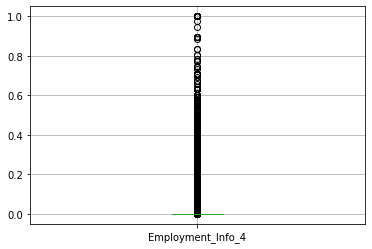

count    59381.000000
mean         0.031294
std          0.072825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64
Skewness:  3.902465335662665


Column:  Employment_Info_5


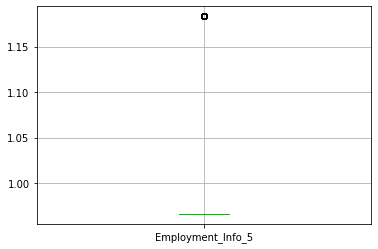

count    59381.000000
mean         0.997108
std          0.075999
min          0.966069
25%          0.966069
50%          0.966069
75%          0.966069
max          1.183188
Name: Employment_Info_5, dtype: float64
Skewness:  2.040114434315022


Column:  InsuredInfo_2


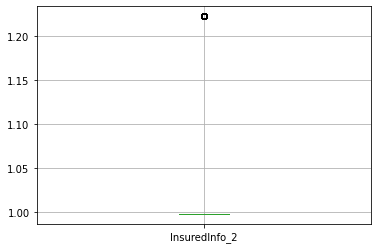

count    59381.000000
mean         0.999815
std          0.019260
min          0.998149
25%          0.998149
50%          0.998149
75%          0.998149
max          1.222477
Name: InsuredInfo_2, dtype: float64
Skewness:  11.474533875946868


Column:  InsuredInfo_4


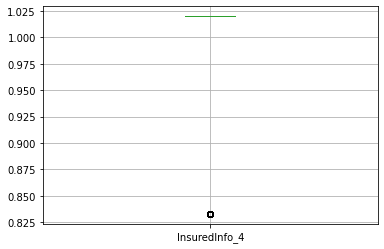

count    59381.000000
mean         0.998198
std          0.060011
min          0.832803
25%          1.019972
50%          1.019972
75%          1.019972
max          1.019972
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.393306022489694


Column:  InsuredInfo_5


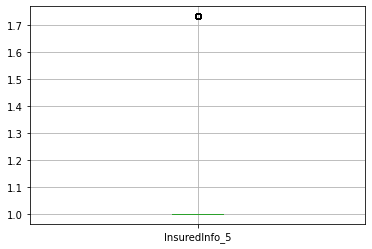

count    59381.000000
mean         1.009949
std          0.084759
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: InsuredInfo_5, dtype: float64
Skewness:  8.402365629626948


Column:  InsuredInfo_7


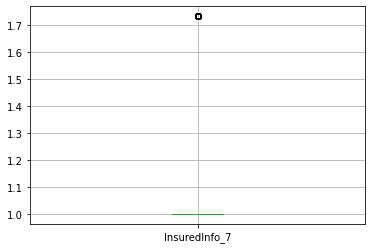

count    59381.000000
mean         1.014103
std          0.100626
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: InsuredInfo_7, dtype: float64
Skewness:  6.9948970198222


Column:  Insurance_History_2


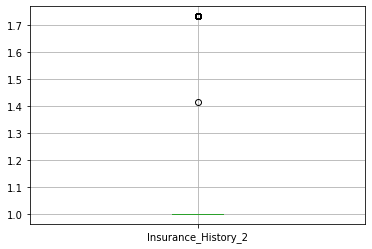

count    59381.000000
mean         1.020422
std          0.120545
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Insurance_History_2, dtype: float64
Skewness:  5.733716300251999


Column:  Insurance_History_5


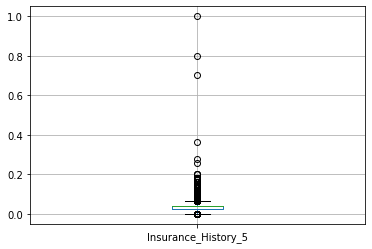

count    59381.000000
mean         0.037953
std          0.017108
min          0.000000
25%          0.025820
50%          0.041630
75%          0.041630
max          1.000000
Name: Insurance_History_5, dtype: float64
Skewness:  6.542273280924704


Column:  Medical_History_1


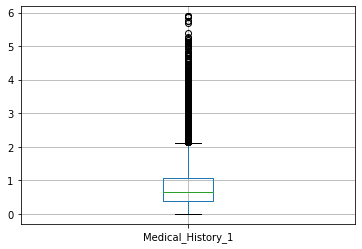

count    59381.000000
mean         0.801214
std          0.598383
min          0.000000
25%          0.380144
50%          0.658428
75%          1.075209
max          5.889160
Name: Medical_History_1, dtype: float64
Skewness:  1.7787560929403596


Column:  Medical_History_3


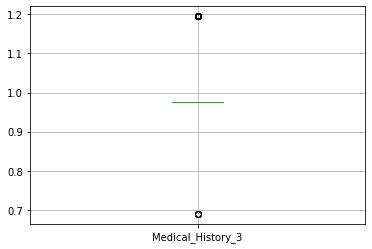

count    59381.000000
mean         0.997789
std          0.066462
min          0.689709
25%          0.975396
50%          0.975396
75%          0.975396
max          1.194611
Name: Medical_History_3, dtype: float64
Skewness:  2.6143850847237826


Column:  Medical_History_5


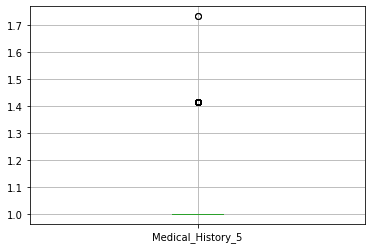

count    59381.000000
mean         1.003045
std          0.035495
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Medical_History_5, dtype: float64
Skewness:  11.626222656321485


Column:  Medical_History_6


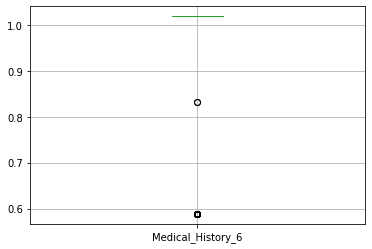

count    59381.000000
mean         0.995166
std          0.098208
min          0.588246
25%          1.018871
50%          1.018871
75%          1.018871
max          1.018871
Name: Medical_History_6, dtype: float64
Skewness:  -3.9019222233821362


Column:  Medical_History_7


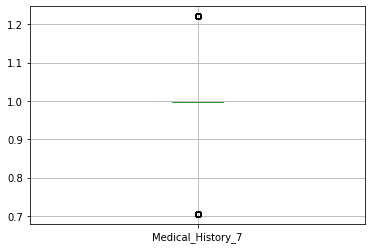

count    59381.000000
mean         0.999098
std          0.042456
min          0.704946
25%          0.996945
50%          0.996945
75%          0.996945
max          1.221003
Name: Medical_History_7, dtype: float64
Skewness:  0.08436167706744828


Column:  Medical_History_10


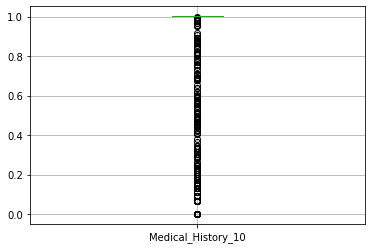

count    59381.000000
mean         0.998623
std          0.052465
min          0.000000
25%          1.001938
50%          1.001938
75%          1.001938
max          1.001938
Name: Medical_History_10, dtype: float64
Skewness:  -16.8178065113735


Column:  Medical_History_11


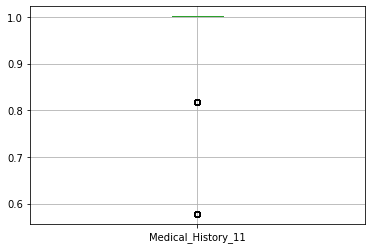

count    59381.000000
mean         0.999814
std          0.019281
min          0.577944
25%          1.001029
50%          1.001029
75%          1.001029
max          1.001029
Name: Medical_History_11, dtype: float64
Skewness:  -18.23545486540272


Column:  Medical_History_12


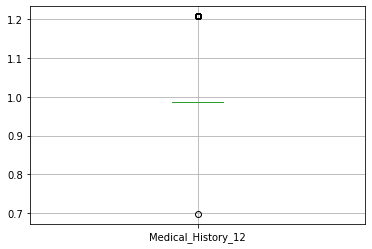

count    59381.000000
mean         0.998687
std          0.051236
min          0.697309
25%          0.986143
50%          0.986143
75%          0.986143
max          1.207774
Name: Medical_History_12, dtype: float64
Skewness:  3.8305873732396356


Column:  Medical_History_13


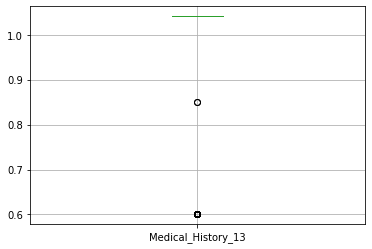

count    59381.000000
mean         0.990031
std          0.140854
min          0.601043
25%          1.041038
50%          1.041038
75%          1.041038
max          1.041038
Name: Medical_History_13, dtype: float64
Skewness:  -2.3995016520475776


Column:  Medical_History_14


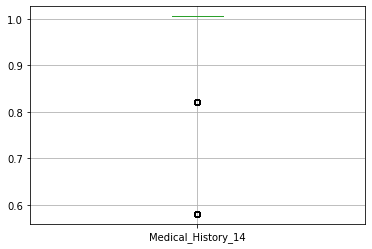

count    59381.000000
mean         0.999240
std          0.038973
min          0.580401
25%          1.005285
50%          1.005285
75%          1.005285
max          1.005285
Name: Medical_History_14, dtype: float64
Skewness:  -7.539414656000194


Column:  Medical_History_15


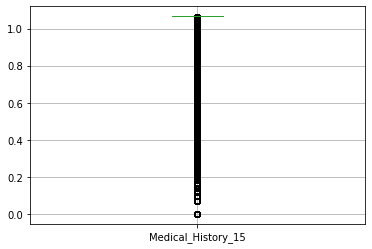

count    59381.000000
mean         0.963395
std          0.268088
min          0.000000
25%          1.066362
50%          1.066362
75%          1.066362
max          1.066362
Name: Medical_History_15, dtype: float64
Skewness:  -2.6341290115954874


Column:  Medical_History_17


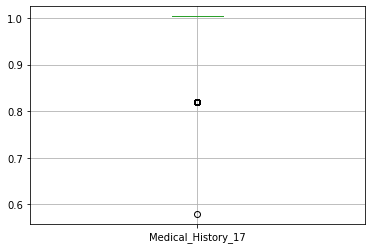

count    59381.000000
mean         0.999634
std          0.027047
min          0.579478
25%          1.003686
50%          1.003686
75%          1.003686
max          1.003686
Name: Medical_History_17, dtype: float64
Skewness:  -6.546585672516852


Column:  Medical_History_18


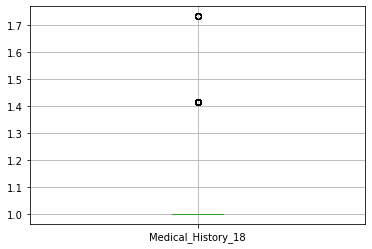

count    59381.000000
mean         1.022159
std          0.093418
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Medical_History_18, dtype: float64
Skewness:  3.993846485415918


Column:  Medical_History_19


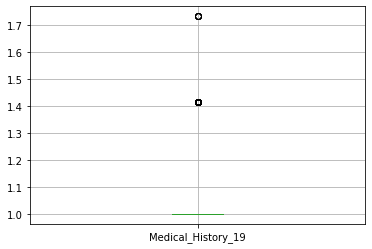

count    59381.000000
mean         1.014264
std          0.075660
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Medical_History_19, dtype: float64
Skewness:  5.130235969543242


Column:  Medical_History_20


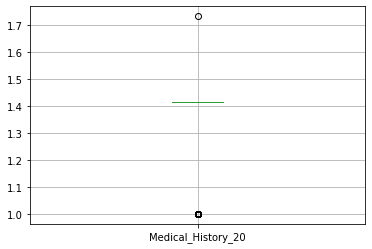

count    59381.000000
mean         1.408032
std          0.050263
min          1.000000
25%          1.414214
50%          1.414214
75%          1.414214
max          1.732051
Name: Medical_History_20, dtype: float64
Skewness:  -7.985183441309315


Column:  Medical_History_21


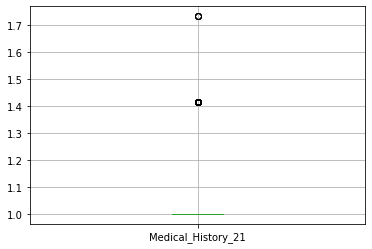

count    59381.000000
mean         1.045139
std          0.129134
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Medical_History_21, dtype: float64
Skewness:  2.5136015909993246


Column:  Medical_History_22


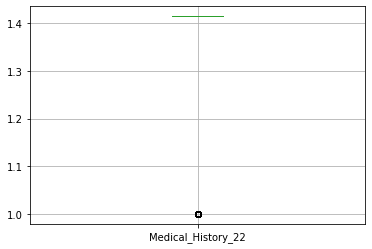

count    59381.000000
mean         1.406610
std          0.055603
min          1.000000
25%          1.414214
50%          1.414214
75%          1.414214
max          1.414214
Name: Medical_History_22, dtype: float64
Skewness:  -7.17630007228637


Column:  Medical_History_24


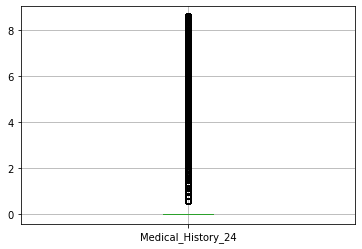

count    59381.000000
mean         0.175711
std          0.984450
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.605030
Name: Medical_History_24, dtype: float64
Skewness:  6.762502634491652


Column:  Medical_History_27


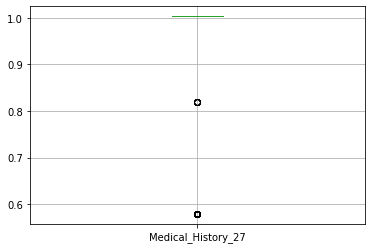

count    59381.000000
mean         0.999122
std          0.041892
min          0.579264
25%          1.003314
50%          1.003314
75%          1.003314
max          1.003314
Name: Medical_History_27, dtype: float64
Skewness:  -9.909937518558143


Column:  Medical_History_28


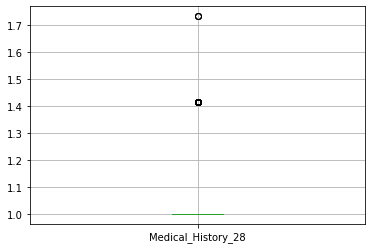

count    59381.000000
mean         1.027834
std          0.103762
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Medical_History_28, dtype: float64
Skewness:  3.462974057144064


Column:  Medical_History_30


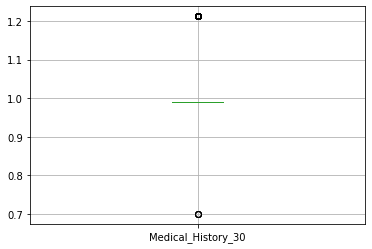

count    59381.000000
mean         0.999027
std          0.044102
min          0.700008
25%          0.989961
50%          0.989961
75%          0.989961
max          1.212449
Name: Medical_History_30, dtype: float64
Skewness:  4.598926400265676


Column:  Medical_History_31


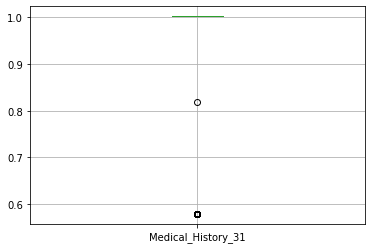

count    59381.000000
mean         0.999344
std          0.036221
min          0.578773
25%          1.002465
50%          1.002465
75%          1.002465
max          1.002465
Name: Medical_History_31, dtype: float64
Skewness:  -11.522697898282868


Column:  Medical_History_32


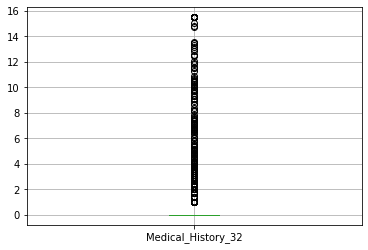

count    59381.000000
mean         0.027380
std          0.471510
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.491933
Name: Medical_History_32, dtype: float64
Skewness:  23.14442414709521


Column:  Medical_History_33


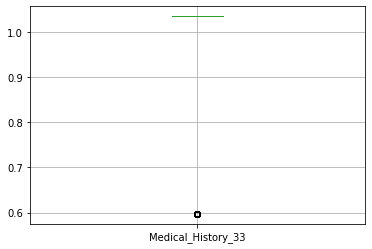

count    59381.000000
mean         0.991543
std          0.129782
min          0.597122
25%          1.034246
50%          1.034246
75%          1.034246
max          1.034246
Name: Medical_History_33, dtype: float64
Skewness:  -2.7101619228096374


Column:  Medical_History_35


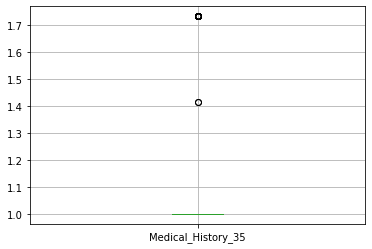

count    59381.000000
mean         1.000754
std          0.023382
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.732051
Name: Medical_History_35, dtype: float64
Skewness:  31.101845333789022


Column:  Medical_History_37


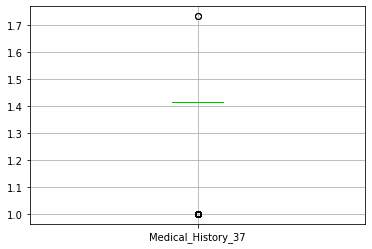

count    59381.000000
mean         1.388694
std          0.099636
min          1.000000
25%          1.414214
50%          1.414214
75%          1.414214
max          1.732051
Name: Medical_History_37, dtype: float64
Skewness:  -3.642406736706679


Column:  Medical_History_38


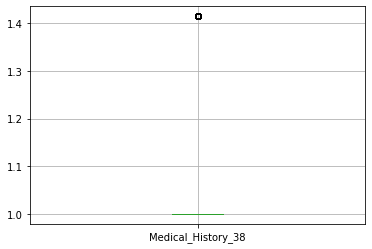

count    59381.000000
mean         1.002009
std          0.028777
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.414214
Name: Medical_History_38, dtype: float64
Skewness:  14.254794535935996


Column:  Medical_History_39


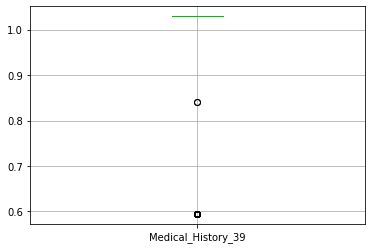

count    59381.000000
mean         0.992640
std          0.121102
min          0.594363
25%          1.029466
50%          1.029466
75%          1.029466
max          1.029466
Name: Medical_History_39, dtype: float64
Skewness:  -2.9846502355393274


Column:  Medical_History_40


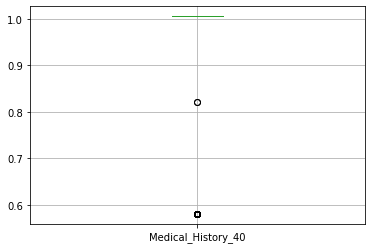

count    59381.000000
mean         0.998561
std          0.053631
min          0.580494
25%          1.005444
50%          1.005444
75%          1.005444
max          1.005444
Name: Medical_History_40, dtype: float64
Skewness:  -7.665418142481131


Column:  Medical_Keyword_1


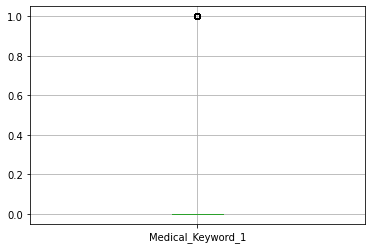

count    59381.000000
mean         0.042000
std          0.200591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_1, dtype: float64
Skewness:  4.5666659378491845


Column:  Medical_Keyword_2


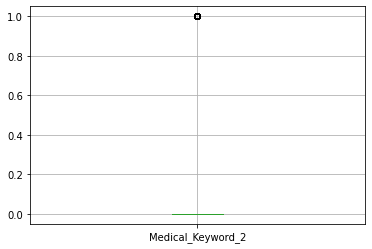

count    59381.000000
mean         0.008942
std          0.094141
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_2, dtype: float64
Skewness:  10.432791909731312


Column:  Medical_Keyword_3


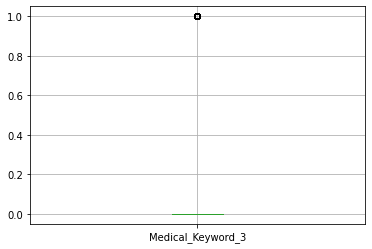

count    59381.000000
mean         0.049275
std          0.216443
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_3, dtype: float64
Skewness:  4.164968625110455


Column:  Medical_Keyword_4


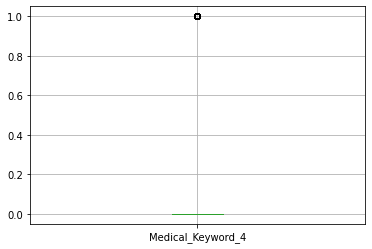

count    59381.000000
mean         0.014550
std          0.119744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_4, dtype: float64
Skewness:  8.108396620359576


Column:  Medical_Keyword_5


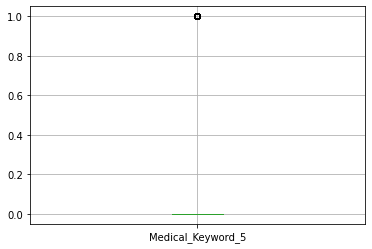

count    59381.000000
mean         0.008622
std          0.092456
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_5, dtype: float64
Skewness:  10.629812858612603


Column:  Medical_Keyword_6


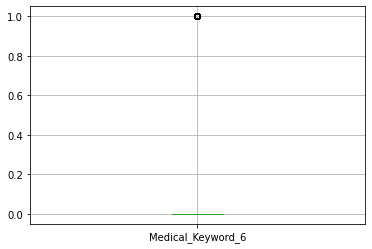

count    59381.000000
mean         0.012597
std          0.111526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_6, dtype: float64
Skewness:  8.74087987028413


Column:  Medical_Keyword_7


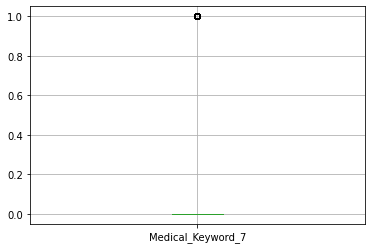

count    59381.000000
mean         0.013910
std          0.117119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_7, dtype: float64
Skewness:  8.301049221080795


Column:  Medical_Keyword_8


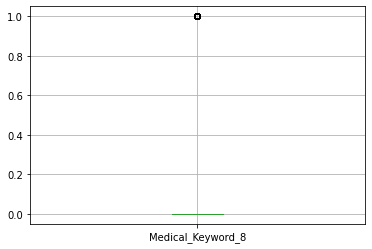

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_8, dtype: float64
Skewness:  9.648884955654573


Column:  Medical_Keyword_9


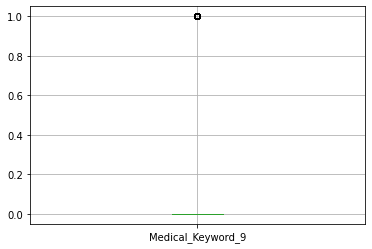

count    59381.000000
mean         0.006652
std          0.081289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_9, dtype: float64
Skewness:  12.138607256170813


Column:  Medical_Keyword_10


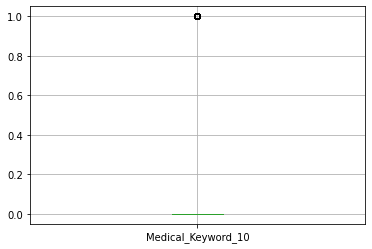

count    59381.000000
mean         0.036459
std          0.187432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_10, dtype: float64
Skewness:  4.9463914904411315


Column:  Medical_Keyword_11


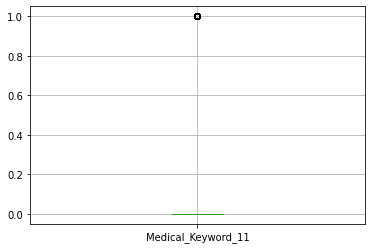

count    59381.000000
mean         0.058015
std          0.233774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_11, dtype: float64
Skewness:  3.7814250849496482


Column:  Medical_Keyword_12


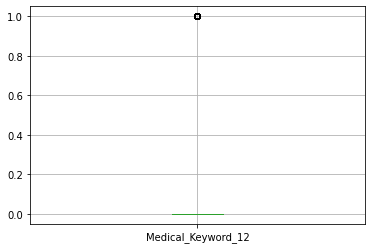

count    59381.000000
mean         0.010003
std          0.099515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_12, dtype: float64
Skewness:  9.847995603913516


Column:  Medical_Keyword_13


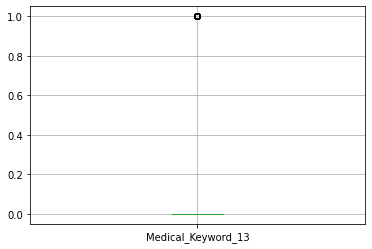

count    59381.000000
mean         0.005962
std          0.076981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_13, dtype: float64
Skewness:  12.835780412504183


Column:  Medical_Keyword_14


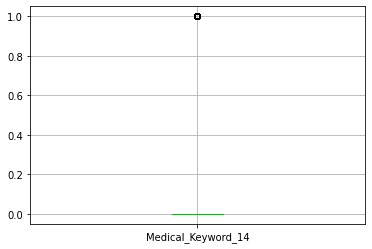

count    59381.000000
mean         0.007848
std          0.088239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_14, dtype: float64
Skewness:  11.155323178356184


Column:  Medical_Keyword_16


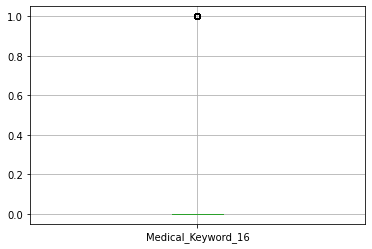

count    59381.000000
mean         0.012715
std          0.112040
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_16, dtype: float64
Skewness:  8.698679907869543


Column:  Medical_Keyword_17


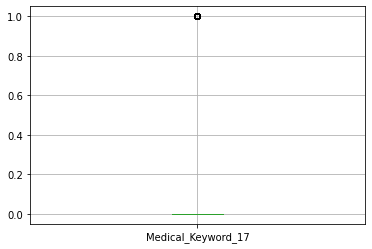

count    59381.000000
mean         0.009161
std          0.095275
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_17, dtype: float64
Skewness:  10.303924482105579


Column:  Medical_Keyword_18


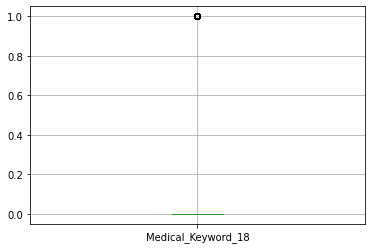

count    59381.000000
mean         0.007494
std          0.086244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_18, dtype: float64
Skewness:  11.421671974293576


Column:  Medical_Keyword_19


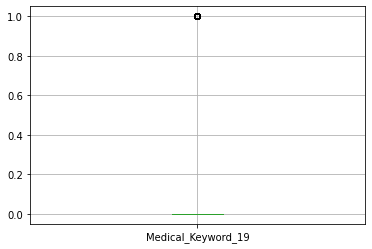

count    59381.000000
mean         0.009296
std          0.095967
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_19, dtype: float64
Skewness:  10.226873540823748


Column:  Medical_Keyword_20


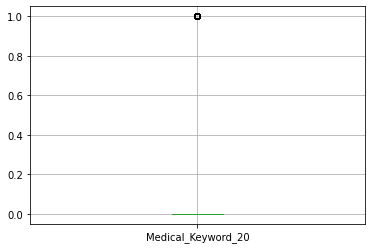

count    59381.000000
mean         0.008134
std          0.089821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_20, dtype: float64
Skewness:  10.95245588470808


Column:  Medical_Keyword_21


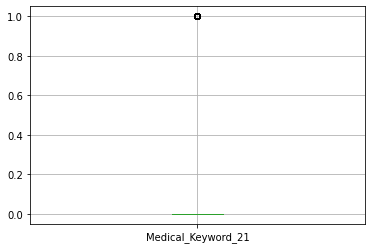

count    59381.000000
mean         0.014601
std          0.119949
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_21, dtype: float64
Skewness:  8.093721182897697


Column:  Medical_Keyword_22


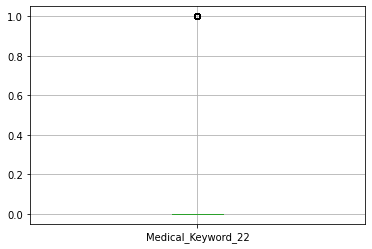

count    59381.000000
mean         0.037167
std          0.189172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_22, dtype: float64
Skewness:  4.893420647372886


Column:  Medical_Keyword_23


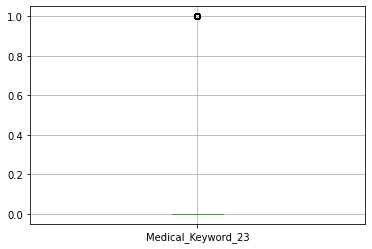

count    59381.000000
mean         0.097775
std          0.297013
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_23, dtype: float64
Skewness:  2.7085541029554148


Column:  Medical_Keyword_24


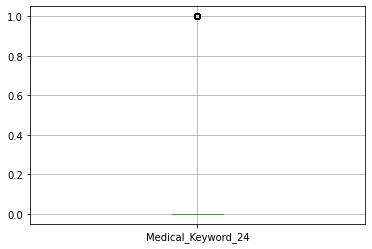

count    59381.000000
mean         0.018895
std          0.136155
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_24, dtype: float64
Skewness:  7.067250142075075


Column:  Medical_Keyword_25


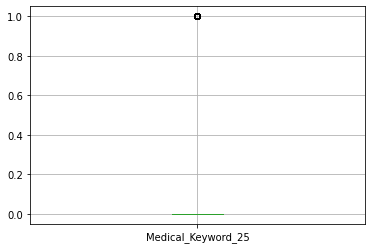

count    59381.000000
mean         0.089456
std          0.285404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_25, dtype: float64
Skewness:  2.877032346250007


Column:  Medical_Keyword_26


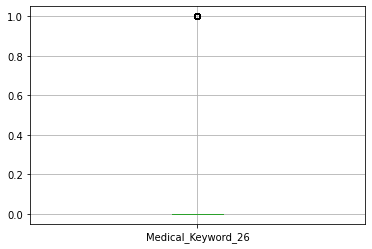

count    59381.000000
mean         0.013439
std          0.115145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_26, dtype: float64
Skewness:  8.45159813798485


Column:  Medical_Keyword_27


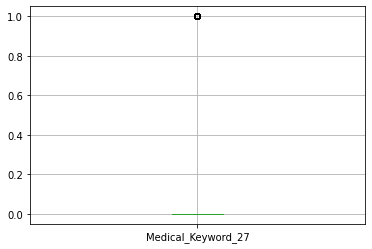

count    59381.000000
mean         0.011856
std          0.108237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_27, dtype: float64
Skewness:  9.020206197261881


Column:  Medical_Keyword_28


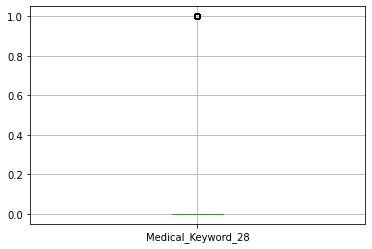

count    59381.000000
mean         0.014937
std          0.121304
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_28, dtype: float64
Skewness:  7.997767218968926


Column:  Medical_Keyword_29


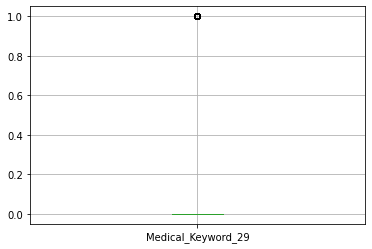

count    59381.000000
mean         0.011755
std          0.107780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_29, dtype: float64
Skewness:  9.06030394281217


Column:  Medical_Keyword_30


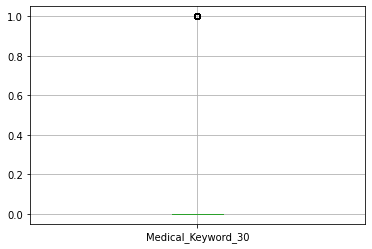

count    59381.000000
mean         0.025042
std          0.156253
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_30, dtype: float64
Skewness:  6.079553863105806


Column:  Medical_Keyword_31


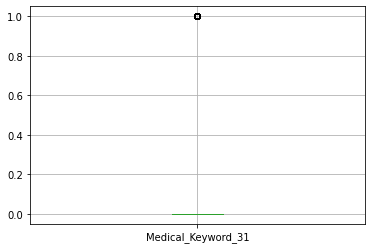

count    59381.000000
mean         0.010896
std          0.103813
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_31, dtype: float64
Skewness:  9.423082385969868


Column:  Medical_Keyword_32


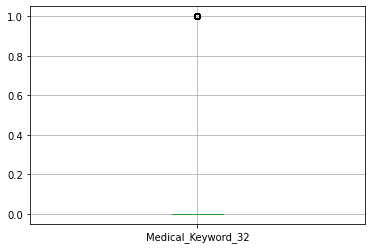

count    59381.000000
mean         0.021168
std          0.143947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_32, dtype: float64
Skewness:  6.653128363192594


Column:  Medical_Keyword_33


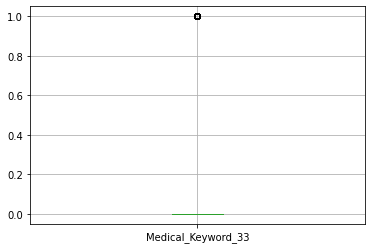

count    59381.000000
mean         0.022836
std          0.149380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_33, dtype: float64
Skewness:  6.388797169381426


Column:  Medical_Keyword_34


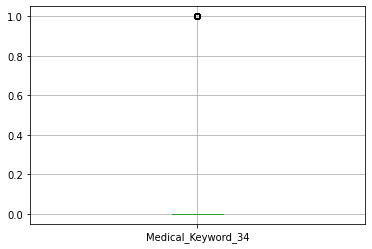

count    59381.000000
mean         0.020646
std          0.142198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_34, dtype: float64
Skewness:  6.742264109637791


Column:  Medical_Keyword_35


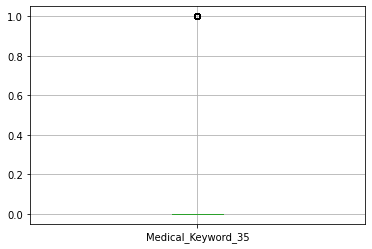

count    59381.000000
mean         0.006938
std          0.083007
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_35, dtype: float64
Skewness:  11.88035176926597


Column:  Medical_Keyword_36


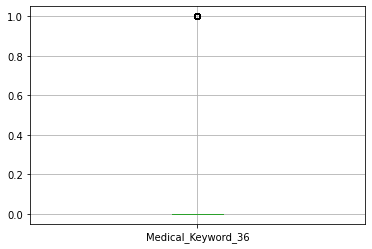

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_36, dtype: float64
Skewness:  9.64888495565458


Column:  Medical_Keyword_37


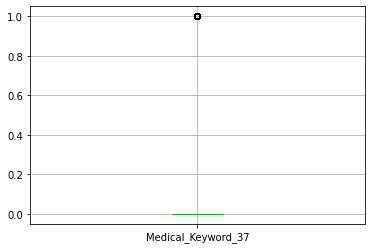

count    59381.000000
mean         0.066587
std          0.249307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_37, dtype: float64
Skewness:  3.477053978141677


Column:  Medical_Keyword_38


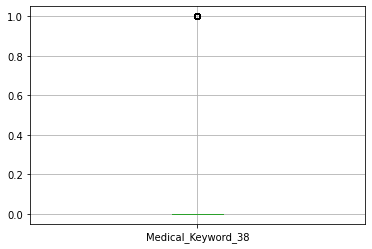

count    59381.000000
mean         0.006837
std          0.082405
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_38, dtype: float64
Skewness:  11.969659278126407


Column:  Medical_Keyword_39


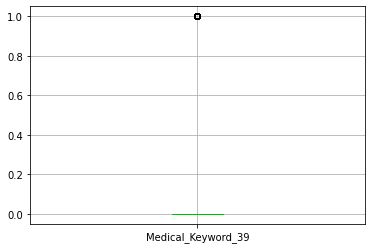

count    59381.000000
mean         0.013658
std          0.116066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_39, dtype: float64
Skewness:  8.38074443186075


Column:  Medical_Keyword_40


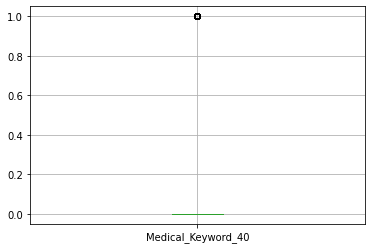

count    59381.000000
mean         0.056954
std          0.231757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_40, dtype: float64
Skewness:  3.82349138600412


Column:  Medical_Keyword_41


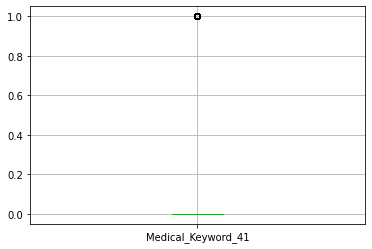

count    59381.000000
mean         0.010054
std          0.099764
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_41, dtype: float64
Skewness:  9.822458539501673


Column:  Medical_Keyword_42


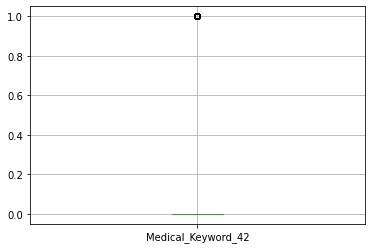

count    59381.000000
mean         0.045536
std          0.208479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_42, dtype: float64
Skewness:  4.35994246504929


Column:  Medical_Keyword_43


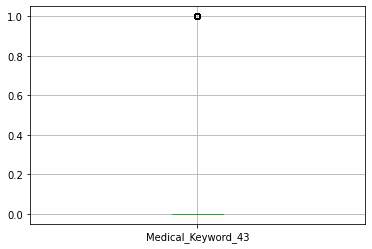

count    59381.000000
mean         0.010710
std          0.102937
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_43, dtype: float64
Skewness:  9.506931409455676


Column:  Medical_Keyword_44


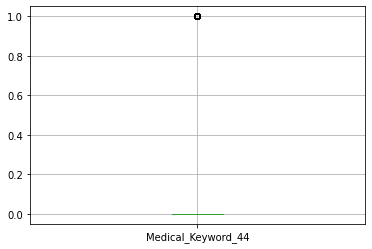

count    59381.000000
mean         0.007528
std          0.086436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_44, dtype: float64
Skewness:  11.395505505541607


Column:  Medical_Keyword_45


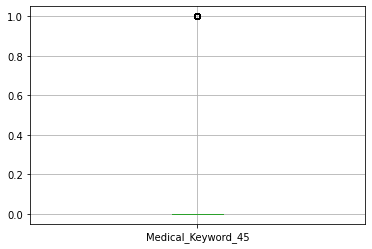

count    59381.000000
mean         0.013691
std          0.116207
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_45, dtype: float64
Skewness:  8.36999289291722


Column:  Medical_Keyword_46


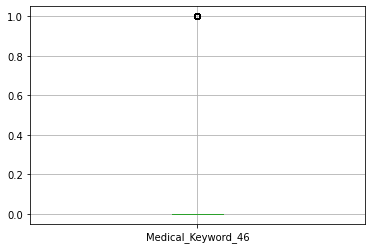

count    59381.000000
mean         0.008488
std          0.091737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_46, dtype: float64
Skewness:  10.716053666043818


Column:  Medical_Keyword_47


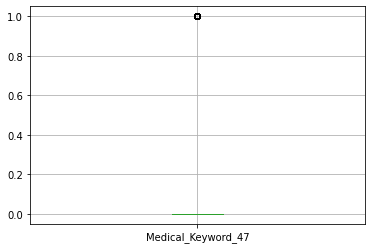

count    59381.000000
mean         0.019905
std          0.139676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_47, dtype: float64
Skewness:  6.874622165948636


Column:  Medical_Keyword_48


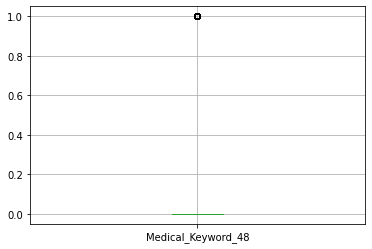

count    59381.000000
mean         0.054496
std          0.226995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_48, dtype: float64
Skewness:  3.9253711340486674




In [35]:
print("-------------------------------------------")
for column in columns:
    if dataset[column].skew() > 2 or dataset[column].skew() < -2:
        dataset[column] = np.sqrt(dataset[column])
        dataset.boxplot(column=column)
        print('Column: ', column)
        plt.show()
        print(dataset[column].describe())
        print('Skewness: ', dataset[column].skew())
        print('\n')

In [36]:
categorical_columns = ["Product_Info_1", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

continuous_columns = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]

discrete_columns = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]

dummy_columns = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

categorical_data = pd.concat([dataset[categorical_columns], testset[categorical_columns]])
continuous_data = pd.concat([dataset[continuous_columns], testset[continuous_columns]])
discrete_data = pd.concat([dataset[discrete_columns], testset[discrete_columns]])
dummy_data = pd.concat([dataset[dummy_columns], testset[dummy_columns]])

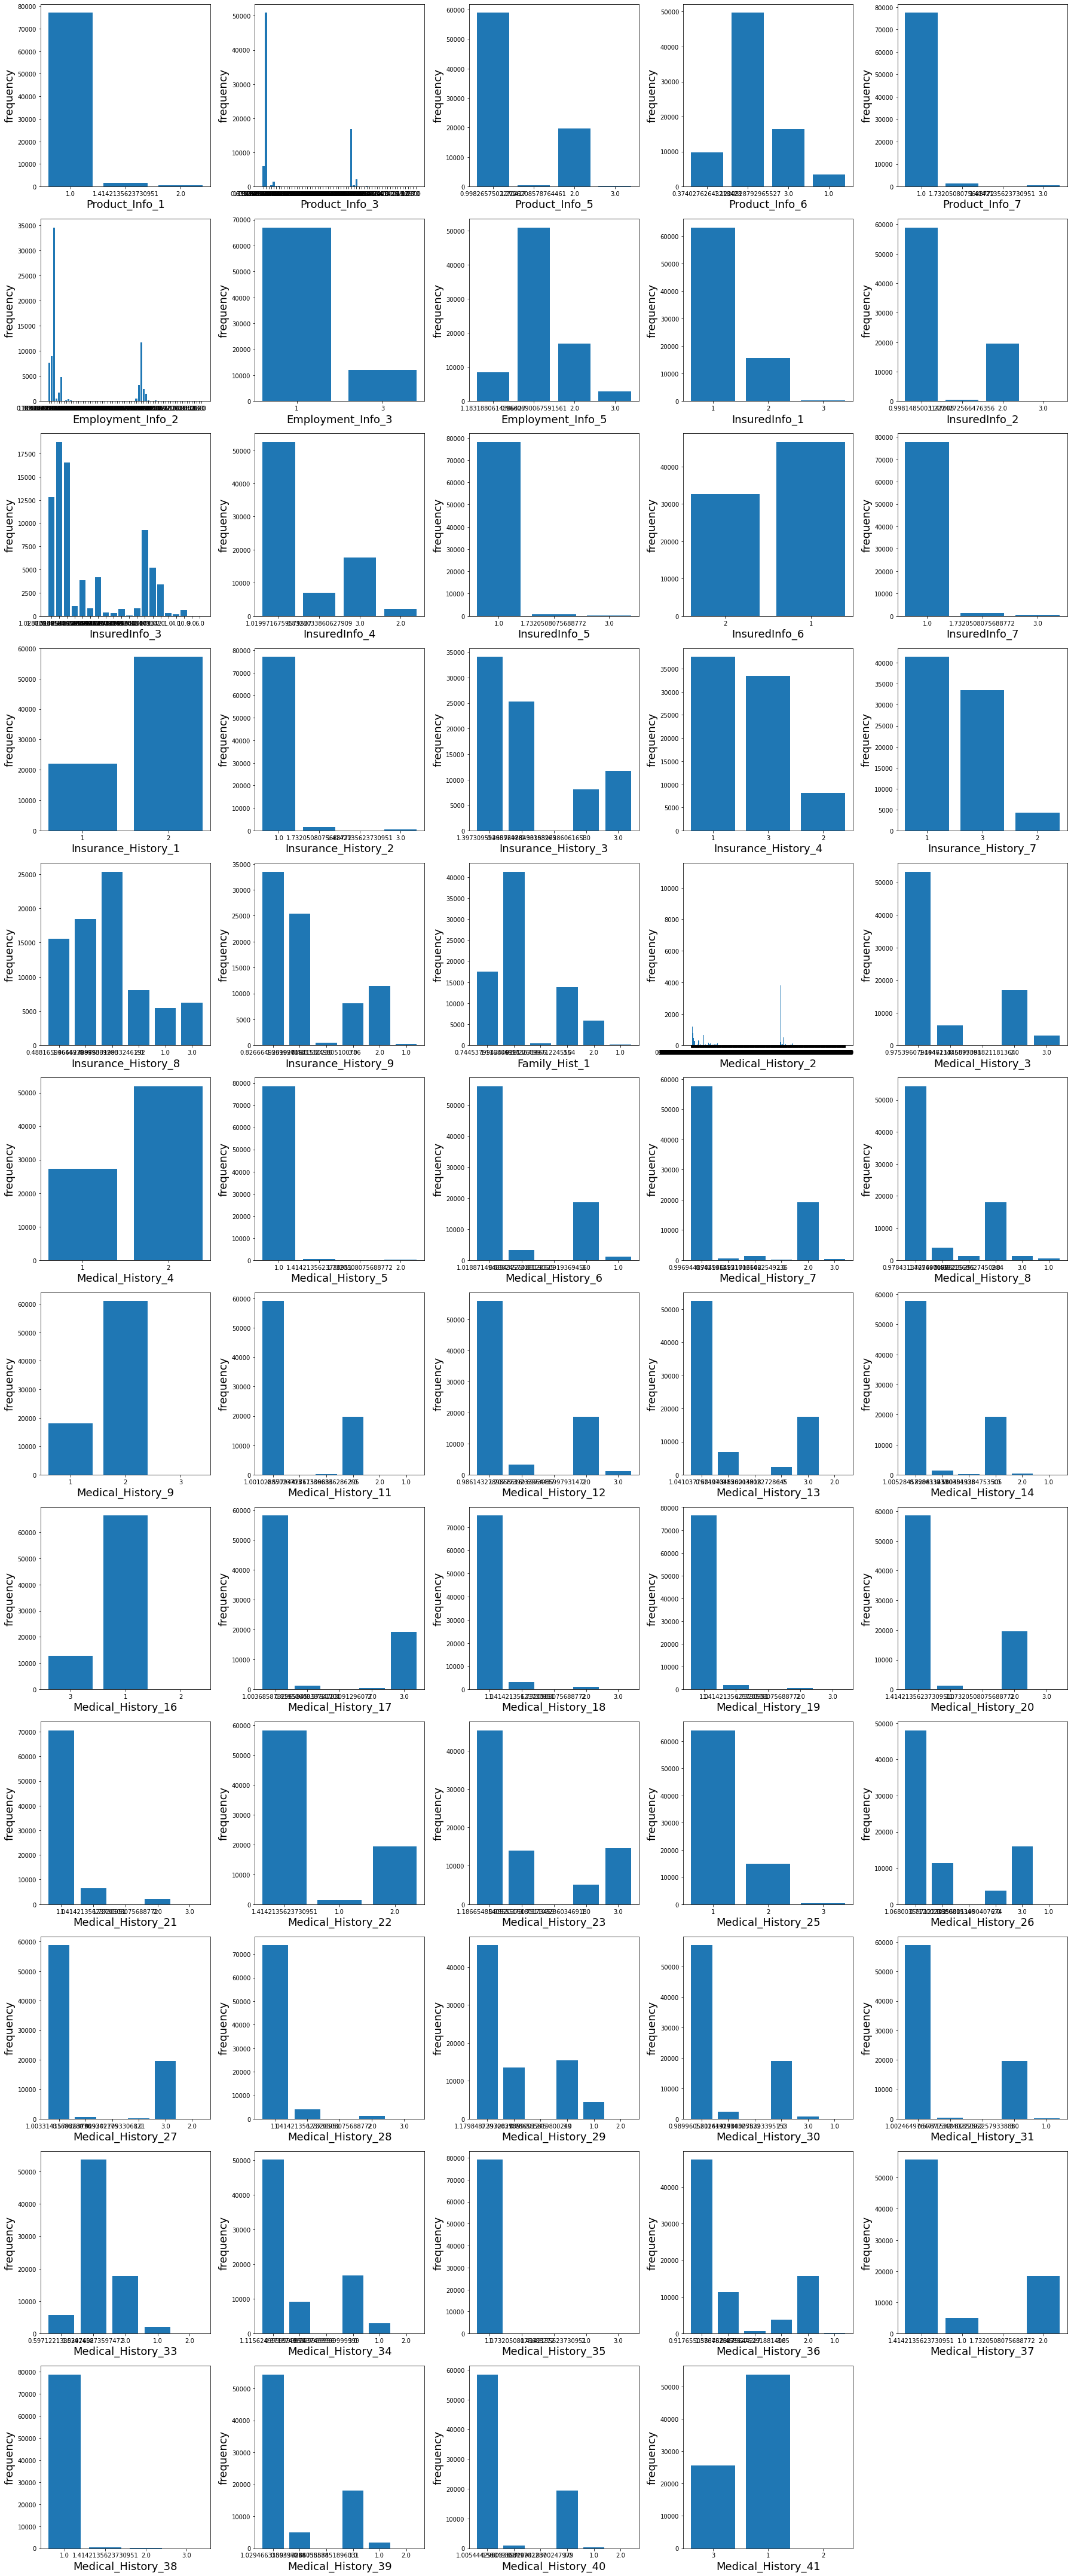

In [37]:
# display categorical data

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

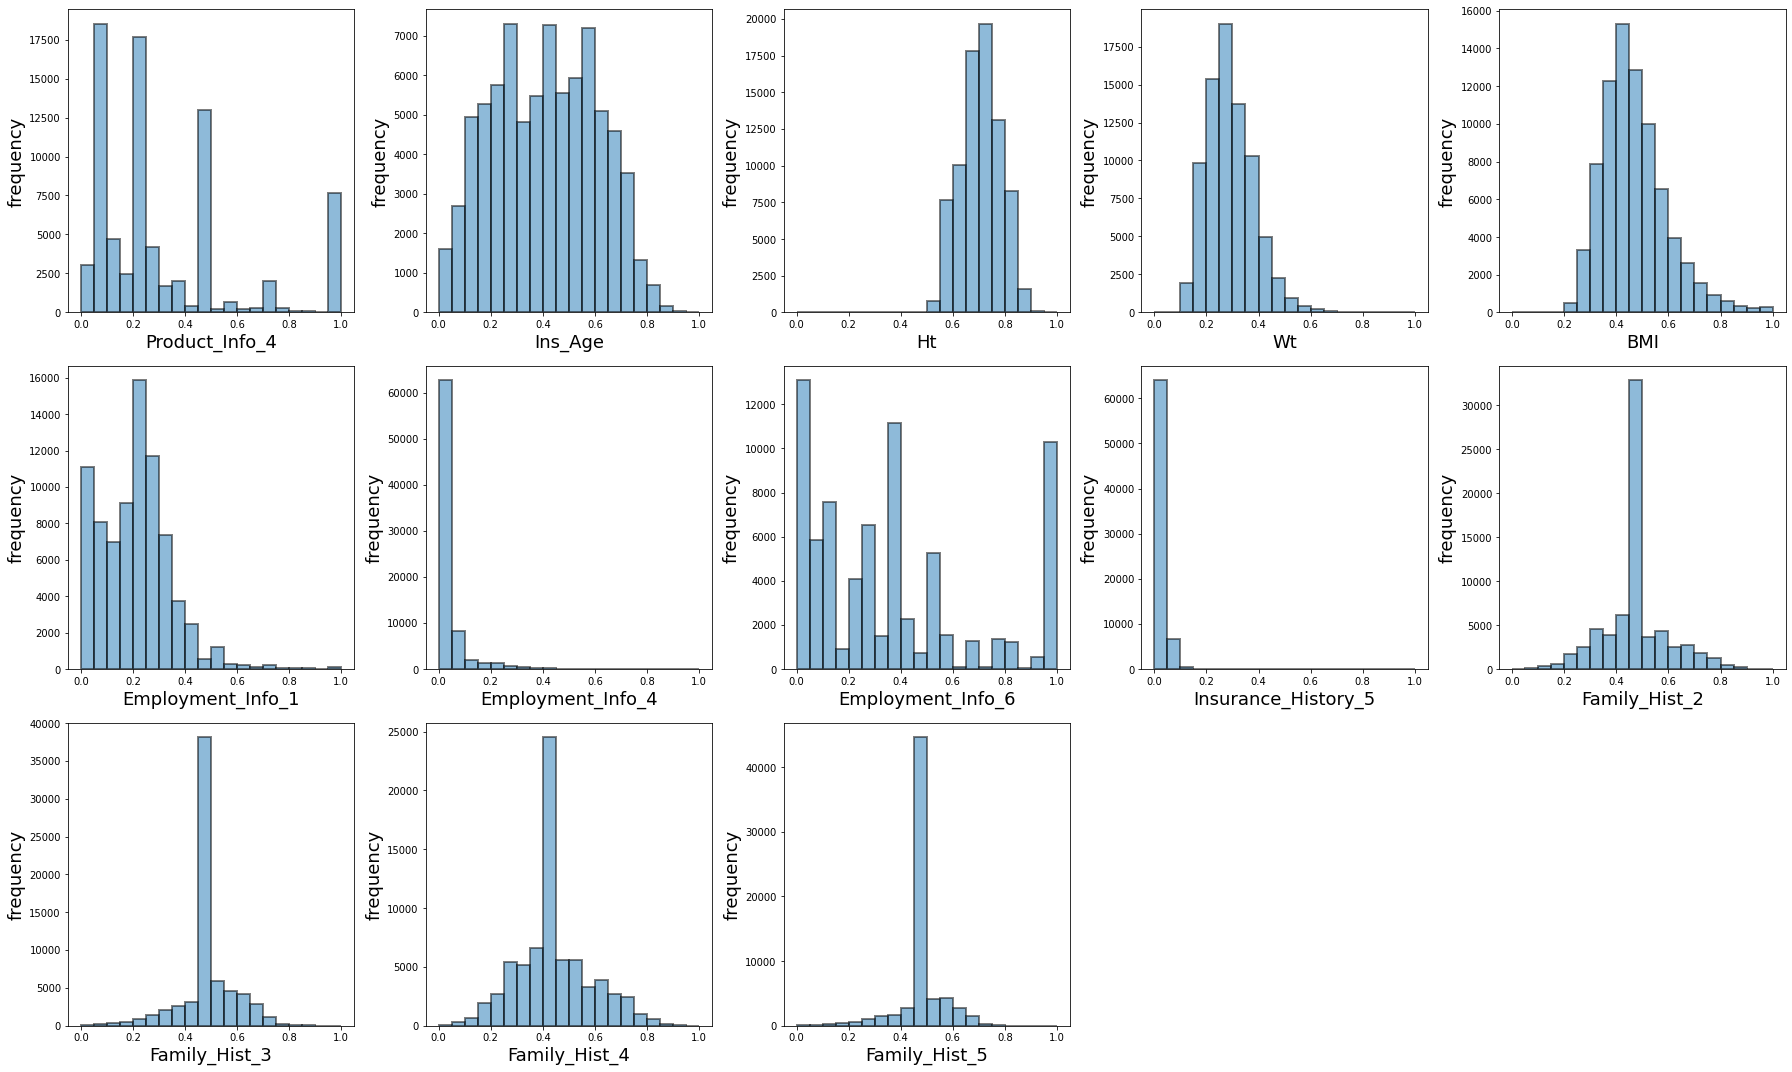

In [38]:
# display continuous data

def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(continuous_data)

In [42]:
X = dataset.drop(["Response"],axis = 1)

y = dataset['Response']

In [43]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 37.58302089701383
0.5 : 37.583385576897136
0.75 : 37.58344437594481
1.0 : 37.583274321772755
1.25 : 37.582926087657626
1.5 : 37.582434054448335
1.75 : 37.58182224422118
2.0 : 37.58110792595622


In [46]:
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.3695174779680429


In [47]:

# List to maintain the cross-validation scores
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 1.1609863271521814
0.5 : -0.011817889183811658
0.75 : -0.011817889183811658
1.0 : -0.011817889183811658
1.25 : -0.011817889183811658
1.5 : -0.011817889183811658
1.75 : -0.011817889183811658
2.0 : -0.011817889183811658


In [48]:

# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 0.25, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.011362329170129803


In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
# training the model
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [54]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Text(0.5, 1.0, 'Confusion Matrix')

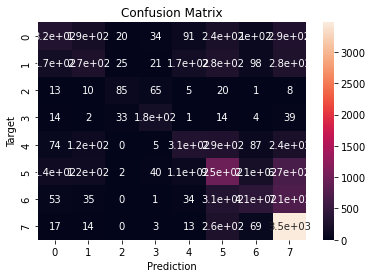

Text(0.5, 1.0, 'Confusion Matrix')

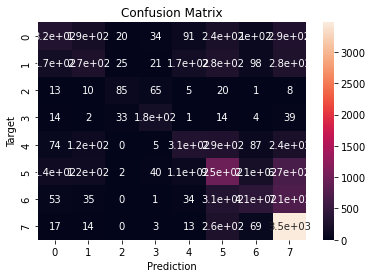

In [56]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [58]:
from sklearn import metrics
from sklearn.metrics import r2_score
from scipy.stats import linregress
print(linregress(y_test.to_numpy().ravel(), np.array(y_pred)))

r2 = r2_score(y_test, y_pred)
print("R squared value : ", r2)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


LinregressResult(slope=0.4859564175284124, intercept=3.5630800390844466, rvalue=0.5392111550340662, pvalue=0.0, stderr=0.006965009674197288, intercept_stderr=0.04262145555319459)
R squared value :  0.0827777260620115
Mean Absolute Error: 1.37290561589627
Mean Squared Error: 5.604613959754147
Root Mean Squared Error: 2.3674065894463814
LinregressResult(slope=0.4859564175284124, intercept=3.5630800390844466, rvalue=0.5392111550340662, pvalue=0.0, stderr=0.006965009674197288, intercept_stderr=0.04262145555319459)
R squared value :  0.0827777260620115
Mean Absolute Error: 1.37290561589627
Mean Squared Error: 5.604613959754147
Root Mean Squared Error: 2.3674065894463814


In [ ]:
#Importing XGBClassifier Model from xgboost

from xgboost import XGBClassifier

model = XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
#Fitting The Values Of X and y

model.fit(X,y)

In [ ]:
#Predicting for the Train Dataset

y_pred = model.predict(X_train)

In [ ]:
#Predicting Values for Test dataset

y_pred_1 = model.predict(X_test)

In [ ]:
#Ploting the Confusion Matrix For Given Set Of trained data.

from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
cm

In [ ]:
#Checking the Accuracy using the Test Data.

acc = accuracy_score(y_test, y_pred_1)
acc

In [ ]:
print(linregress(y_test.to_numpy().ravel(), np.array(y_pred_1)))

r2 = r2_score(y_test, y_pred_1)
print("R squared value : ", r2)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

print("Confusion Matrix : \n", confusion_matrix(y_test, predictions))
